<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Libraries</p>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">1. General</p>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2. K-Means</p>

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">3. HCA</p>

In [3]:
from sklearn import cluster
from scipy.cluster import hierarchy

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">4. PCA</p>

In [4]:
from pca import pca as PCA2
from sklearn.decomposition import PCA as PCA1

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 1 - Story</p>

Instacart allows online shopping, serving verticals including beauty, electronics, groceries, and pets, at the convenience of your home, delivered to your doorstep. Order placement is enabled via the app or website, routed to personal shoppers, for review, pick-up, and delivery, covering over 1,100 retail banners across more than 5,500 cities. The data science team, thereby, contributes greatly to the customer experience of the app or website. 

I contribute to user engagement via predictive marketing as part of my role. Therefore, I am developing models to provide personalized recommendations or promotions to users based on their ordering behavior across a broad range of product categories. In the current project, this is to be approached via clustering, an unsupervised machine learning technique.

As an experiment within the larger project, the k-means++ and the agglomerative hierarchical algorithm are to be applied both prior to and after PCA analysis. The resultant models aim at the extraction of user segments as well as differences in their attributes. By understanding the demands of customer segments, the aforementioned recommendations and promotions may be inferred, whereby the added value for Instacart is higher engagement, leading to higher revenue.

<center>

<b>Source</b>

<em>https://www.kaggle.com/datasets/psparks/instacart-market-basket-analysis</em> 

</center>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 2 - The Data</p>

The following section describes the datasets subject to the experiments. More specifically, it will be outlined as to what it consists of and how it fits within the context of the experiments. In the event that the dataset appears to be valid according to that outline, it will be read.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">1. Features</p>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">1.1 products.csv</p>

<center>

| Feature | Description |
| :----: | :----: |
| product_id | unique identifier of product |
| product_name | name of product |
| aisle_id | unique identifier of aisle |
| department_id | unique identifier of department |

<b>definition (product)</b>: good to be sold embodied as grocery

<b>context</b>: product/s delivered to user by shopper, ordered via Instacart app or website

</center>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">1.2 orders.csv</p>

<center>

| Feature | Description |
| :----: | :----: |
| order_id | unique identifier of order |
| user_id | unique identifier of user |
| eval_set | name of partition (prior, train, test) |
| order_number | quantity of orders placed by same customer |
| order_dow | weekday of order (0 to 6 starting on Sunday)|
| order_hour_of_day | hour of order (0 to 23) |
| days_since_prior_order | interval between two orders placed by same customer |

<b>definition (order)</b>: concurrence between user and Instacart on delivery of product/s

<b>context</b>: single or multitude of product/s, delivered as single unit to user by personal shopper

</center>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">1.3 order_products__prior.csv</p>

<center>

| Feature | Description |
| :----: | :----: |
| order_id | unique identifier of order |
| product_id | unique identifier of product |
| add_to_cart_order | consecutive quantity of products added to an order |
| reordered | binary expression of whether a product added to an order has been ordered previously by same customer |

<b>definition</b>: <em>see products.csv & orders.csv</em>

<b>context</b>: <em>see products.csv & orders.csv</em>

</center>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">1.4 aisles.csv</p>

<center>

| Feature | Description |
| :----: | :----: |
| aisle_id | unique identifier of aisle |
| aisle | name of aisle |

<b>definition (aisle)</b>: long, narrow space between the rows of shelves in shop, accomodating related products

<b>context</b>: categoric space in which a product contained within an order placed by a user is to be found in-store

</center>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">1.5 departments.csv</p>

<center>

| Feature | Description |
| :----: | :----: |
| department_id | unique identifier of department |
| department | name of department |

<b>definition (department)</b>: space in shop, accomodating related aisles

<b>context</b>: categoric space in which a product contained within an order placed by a user is to be found in-store

</center>


<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2. Experiment Context</p>

The datasets provide transactional data pertaining to the grocery vertical. These disparate datasets reflect collectively when merged, products within orders placed by users as well as their behavior. Columns define thereby users' behavior, whereas rows represent products ordered by them.

In the experiments, users are to be segmented according to their order behavior. Order behavior will be explored in terms of the product compositions contained in orders placed by users. As the experiments cover a wide range of product categories, reasonable clustering dimensionality is maintained by abstraction. Such abstraction of a product can be found in the column "department_name". A mapping between those departments and users is enabled by "user_id", suggesting the usage of the presented datasets.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">3. Loading Datasets</p>

In [5]:
datasets = []
file_names = ["aisles.csv",
              "departments.csv", 
              "order_products__prior.csv",
              "orders.csv",
              "products.csv"]

for i in file_names:
    file = pd.read_csv(f"dataset/{i}")
    datasets.append(file)

In this code block, disparate datasets relevant to the experiments are read and stored within a single list "datasets".

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 3 Part 1 - IDA</p>

It is within this section that the individual disparate datasets are listed with their respective features, in order to make sense of the merging operations performed later on to generate the experiment's collective dataset.

In [6]:
for i in range(0, len(datasets)):
    print(f"dataset: {file_names[i]}")
    for j in range(0, len(datasets[i].columns)):
        print(f"{j + 1:>1}. column: {datasets[i].columns[j]}")
    print(f"\n")

dataset: aisles.csv
1. column: aisle_id
2. column: aisle


dataset: departments.csv
1. column: department_id
2. column: department


dataset: order_products__prior.csv
1. column: order_id
2. column: product_id
3. column: add_to_cart_order
4. column: reordered


dataset: orders.csv
1. column: order_id
2. column: user_id
3. column: eval_set
4. column: order_number
5. column: order_dow
6. column: order_hour_of_day
7. column: days_since_prior_order


dataset: products.csv
1. column: product_id
2. column: product_name
3. column: aisle_id
4. column: department_id




<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 4 Part 1 - EDA, Preprocessing</p>

In the following, prior to further initial data analysis, the aforementioned collective dataset for the subsequent experiments is generated. By doing so, we ensure that the initial data analysis includes all relevant instances while avoiding redundant outputs within analysis.

In [7]:
df_d = pd.merge(left = datasets[1], 
                right = datasets[4], 
                how = "right", 
                on = "department_id")

The datasets of type dimension contained within the list "datasets" are merged within this code block and stored in the DataFrame "df_d". In this instance, a right join is applied on the single common merge key "department_id". Right join, as only departments affiliated with Instacart products should be considered. A justification for the merge and the associated consideration of the "product.csv" is based on the absence of matching merge keys between the fact datasets and the "department.csv".

In [8]:
df_f = pd.merge(left = datasets[2], 
                right = datasets[3], 
                how = "outer", 
                on = "order_id")

By means of this code block, fact datasets are merged based on the single common merge key "order_id" and stored in a DataFrame as "df_f". The outer join is applied given the type of table, in which all rows are relevant, presupposing complete inclusion. As such, "order_products__prior.csv" provides relevant instances pertaining to products within orders placed on which later departments are based as well as "order.csv" regarding the users associated with these orders, enabling later mappings.

In [9]:
df = pd.merge(left = df_f, 
              right = df_d, 
              how = "left", 
              on = "product_id")

The DataFrames "df_f" and "df_d" are merged based upon the single common merge key "product_id" as part of this code block and stored in "df" as a DataFrame. As "df_d" is by nature of type dimension, providing metadata regarding departments, the omission of rows not present within the fact table is suggested and thus a left join. The resulting DataFrame includes the behavioral parameter "department_name", along with "user_id", allowing mapping to the users.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 3 Part 2 - IDA</p>

This section provides a high-level understanding of the DataFrame to be experimented with, i.e. an overview, is obtained, necessary for informed decisions on how to proceed with preprocessing.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">3/2.1 Function</p>

In [10]:
def initial_data_analysis(df):
    """Parameters: df = DataFrame containing data to be analyzed
    
       Function: performs initial data analysis, including the display of the first eight lines, their shapes, and columns as well as their missing values and type
    """
    
    print(f"dataset overview:")
    display(df.head(8))

    print(f"\n\nshape: \n{df.shape[0]} rows & {df.shape[1]} columns")

    print(f"\n\ncolumn information:")
    for i in range(0, len(df.columns)):
        print(f"{i:>2}. column: {df.columns[i]:<22} | missing values: {df[df.columns[i]].isna().sum(axis = 0):<7} | {df.dtypes[i]}")

    return

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">3/2.2 Application</p>

In [11]:
initial_data_analysis(df)

dataset overview:


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department_id,department,product_name,aisle_id
0,2,33120.0,1.0,1.0,202279,prior,3,5,9,8.0,16.0,dairy eggs,Organic Egg Whites,86.0
1,2,28985.0,2.0,1.0,202279,prior,3,5,9,8.0,4.0,produce,Michigan Organic Kale,83.0
2,2,9327.0,3.0,0.0,202279,prior,3,5,9,8.0,13.0,pantry,Garlic Powder,104.0
3,2,45918.0,4.0,1.0,202279,prior,3,5,9,8.0,13.0,pantry,Coconut Butter,19.0
4,2,30035.0,5.0,0.0,202279,prior,3,5,9,8.0,13.0,pantry,Natural Sweetener,17.0
5,2,17794.0,6.0,1.0,202279,prior,3,5,9,8.0,4.0,produce,Carrots,83.0
6,2,40141.0,7.0,1.0,202279,prior,3,5,9,8.0,13.0,pantry,Original Unflavored Gelatine Mix,105.0
7,2,1819.0,8.0,1.0,202279,prior,3,5,9,8.0,13.0,pantry,All Natural No Stir Creamy Almond Butter,88.0




shape: 
32640698 rows & 14 columns


column information:
 0. column: order_id               | missing values: 0       | int64
 1. column: product_id             | missing values: 206209  | float64
 2. column: add_to_cart_order      | missing values: 206209  | float64
 3. column: reordered              | missing values: 206209  | float64
 4. column: user_id                | missing values: 0       | int64
 5. column: eval_set               | missing values: 0       | object
 6. column: order_number           | missing values: 0       | int64
 7. column: order_dow              | missing values: 0       | int64
 8. column: order_hour_of_day      | missing values: 0       | int64
 9. column: days_since_prior_order | missing values: 2078068 | float64
10. column: department_id          | missing values: 206209  | float64
11. column: department             | missing values: 206209  | object
12. column: product_name           | missing values: 206209  | object
13. column: aisle_id           

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 4 Part 2 - EDA, Preprocessing</p>

The purpose of this section is to prepare the DataFrame for the final stage of initial data analysis. Therefore the DataFrame is truncated to a manageable sample, in order to avoid excessively long algorithm run times. In order to prevent the loss of parts of an instance during truncation, it is necessary to arrange the DataFrame in such a manner that each instance represents a row. Each instance must be meaningful within the sample, wherefore relevant "NaN" values are addressed. For the initial data analysis, i.e. the statistical overview in the final step, to be representative, it should be based on the sample used during experiments, giving preprocessing priority.

In [12]:
dspo = "days_since_prior_order"

unique_days = df[dspo].unique()
unique_days.sort()
display(unique_days)

df[dspo] = df[dspo].fillna(-1)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., nan])

The purpose of this code block is to fill the "NaN" values within the feature "days_since_prior_order". Accordingly, first, assigned unique values are returned in order. Values obtained range from 0 to 30. As "NaN" values represent the first order placed by a user, the yet unassigned -1 is chosen as the fill value.

In [13]:
row_NaN = df[df.isnull().any(axis = 1)]
total_NaN_values = df.isnull().sum().sum()
column_number = df.isnull().any().sum()

if row_NaN.shape[0] == (total_NaN_values / column_number):
    print(f"Missing values appear respectively in the same row.")
else:
    print(f"Missing values do not appear respectively in the same row.")

display(row_NaN["eval_set"].unique())


partition_size_train_test = df[(df.eval_set != "prior")].shape[0]

if row_NaN.shape[0] == partition_size_train_test:
    print(f"Each partition entry is affected by 'NaN' values")
else:
    print(f"Not every partition entry is affected by 'NaN' values")

Missing values appear respectively in the same row.


array(['train', 'test'], dtype=object)

Each partition entry is affected by 'NaN' values


By means of this code block, the distribution of relevant "NaN" values is verified. The remaining "NaN" values were found to fall in the same rows. Affected rows include only those with the values "train" and "test", specified within the column "eval_set". Among these rows corresponding to the value "train" or "test", each is affected.

In [14]:
df.dropna(inplace = True)

The values "train" and "test" are predefined splits for a competition, to be populated by "order_products__train.csv". Rows with the value "prior" in the column "eval_set" are excluded from the competition and therefore detached. As a result, all remaining "NaN" values can be dropped, done within this code block.

In [15]:
df_ana = pd.crosstab(df["user_id"],
                     df["department"])

A DataFrame is created in this code block with "user_id" as the index, allowing for subsequent mapping, along with the behavior parameter "department_name" as columns. Accordingly, each order per user is totaled by department, representing the respective values. Results are stored in the variable "df_ana".

In [16]:
random_state = 1
df_ana_sub = df_ana.sample(n = 5000, 
                           random_state = random_state)

A representative sample is created and stored within "df_ana_sub" to avoid long run times. Out of the 206,209 remaining instances, 5,000 are randomly allocated to the sample, according to random state one. As each instance within "df_ana", represents a separate unit, i.e. a user, detached from the other instances, sampling is permitted.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 3 Part 3 - IDA</p>

A statistical summary is now produced based on the representative sample "df_ana_sub". Therefore, one can form a sense of the sample upon which experiments are subsequently carried out.

In [17]:
df_ana_sub.describe()

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.728200,1.939000,5.700800,12.636400,3.460800,0.160200,5.211000,25.494800,4.956000,4.231600,...,3.506400,1.273400,3.441000,0.327200,0.187600,9.046400,2.103800,0.557200,45.107200,13.958600
std,5.667058,9.661736,11.357794,23.113421,7.765187,1.049741,9.828011,39.773594,10.681951,8.138059,...,8.471311,3.103188,6.763407,1.376125,1.355719,14.233157,5.216519,4.614346,70.498971,27.110239
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.000000,1.000000
50%,0.000000,0.000000,2.000000,5.000000,1.000000,0.000000,2.000000,11.000000,2.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,20.000000,5.000000
75%,0.000000,0.000000,6.000000,14.000000,4.000000,0.000000,6.000000,29.000000,5.000000,5.000000,...,3.000000,1.000000,4.000000,0.000000,0.000000,11.000000,2.000000,0.000000,52.000000,15.000000
max,143.000000,191.000000,160.000000,412.000000,145.000000,26.000000,127.000000,733.000000,239.000000,105.000000,...,177.000000,55.000000,80.000000,30.000000,58.000000,220.000000,98.000000,193.000000,899.000000,411.000000


<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 4 Part 3 - EDA, Preprocessing</p>

As part of the explanatory data analysis, this section creates an overview of the size ratios for total orders by department. This serves as a means of supporting the delegation of the attributes of each segment of users, extracted later on.

In [18]:
def bar_department(df):
    """Parameter: df = DataFrame
    
       Function: bar plots sum of orders per department
    """

    df = df.sum().reset_index()
    
    sns.barplot(data = df, 
                x = 0, 
                y = "department");
    plt.title("Order Distribution");
    plt.xlabel("orders (sum)");

    return

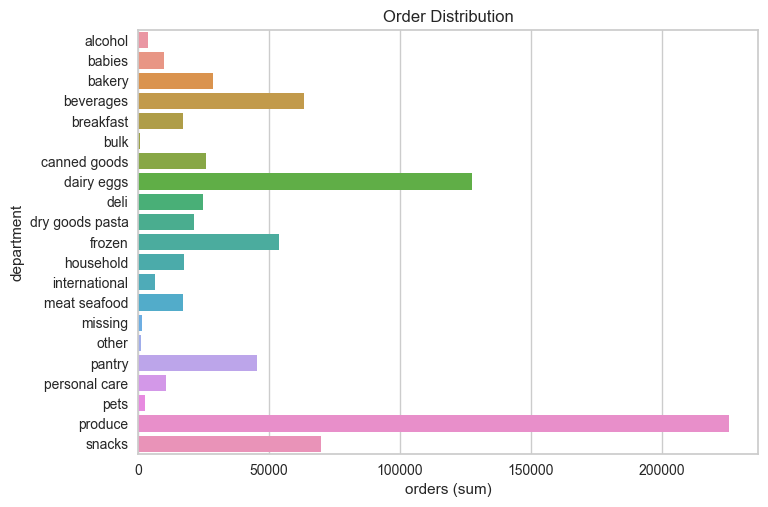

In [19]:
bar_department(df_ana_sub)

Produce accounts for the majority of demand, followed by dairy and eggs, with about two-thirds of it. Behind that the departments, beverages, frozen, pantry, and snacks level out at about one-third of produce. While alcohol, bulk, missing, other, and pets are seldom ordered. All the remaining departments are located in between.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 5 - Clustering</p>

Clustering algorithms are employed to extract individual user segments in this section. These user segments serve as the basis for extracting corresponding attributes later on.

In [20]:
sc = StandardScaler()
df_sc = pd.DataFrame(data = sc.fit_transform(df_ana_sub),
                     index = df_ana_sub.index,
                     columns = df_ana_sub.columns)

Within this code block, the sample DataFrame instances are aligned in scaling by the standard scaler, owing to the sensitivities of the algorithms used in the experiment.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">1. General Function</p>

In [21]:
def plot_cluster_assignments(df):
    """Paramter: df = DataFrame
    
       Function: bar plots cluster assignment count per cluster
    """

    counts = df["cluster"].value_counts()
    
    plt.bar(counts.index,
            counts.values,
            color = ["#99a3ae", "#97e5b7"])
    plt.title("Cluster Assignments");
    plt.xlabel("cluster");
    plt.ylabel("size");

    len_c = len(counts)
    cluster = np.linspace(0, len_c - 1, len_c).astype(int)
    plt.xticks(cluster);

    return

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2. K-Means</p>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">2.1 Functions</p>

In [22]:
def plot_silhouette_coefficients(df_sc, max_clusters = 11):
    """Parameter: df_sc = scaled DataFrame
                  max_clusters = upper confines for n_clusters tuning

       Function: hyperparameter tuning for K-Means algorithms on n_clusters
    """

    silhouettes = []

    for i in range(2, max_clusters):
        kmeans = KMeans(n_clusters = i,
                        init = "k-means++",
                        n_init = 10,
                        random_state = random_state)
        cluster_assignments = kmeans.fit_predict(df_sc)
        silhouettes.append(silhouette_score(df_sc, 
                                            cluster_assignments))
    
    plt.plot(range(2, max_clusters), 
             silhouettes,
             color = "#99a3ae");
    plt.title("Silhouette Coefficient Plot of KMeans Clustering for 5000 Samples");
    plt.xlabel("clusters");
    plt.ylabel("silhouette coefficient values");
    max_silhouette_coefficient = silhouettes[np.argmax(silhouettes)]
    plt.axhline(y = max_silhouette_coefficient, 
                color = "#fe0101",
                linestyle = "--",
                label = np.round(a = max_silhouette_coefficient,
                                 decimals = 2));
    plt.legend(title = "Average Silhouette Score",
               loc = "center right");

    return

In [23]:
def plot_silhouette(df_sc, n_clusters):
    """Parameter: df_sc = scaled DataFrame
                  n_clusters = number of clusters to form
                   
       Function: plots silhouette of K-Means clustering
    """

    kmeans = KMeans(n_clusters = n_clusters,
                    init = "k-means++",
                    n_init = 10,
                    random_state = random_state)
    
    visualizer = SilhouetteVisualizer(estimator = kmeans, 
                                      colors = "flatui", 
                                      is_fitted = False)
    visualizer.fit(df_sc).finalize()
    visualizer.show()

    return

In [24]:
def KMeans_cluster_assignment(df, n_clusters):
    """Parameter: df = DataFrame
                  n_clusters = number of clusters to form

       Function: creates derived variable, concerning clusters               
    """

    kmeans = KMeans(n_clusters = n_clusters,
                    init = "k-means++",
                    n_init = 10,
                    random_state = random_state)
    
    labels = kmeans.fit_predict(df_sc)

    df_KMeans = df
    df_KMeans["cluster"] = labels

    return df_KMeans

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">2.2 Application</p>

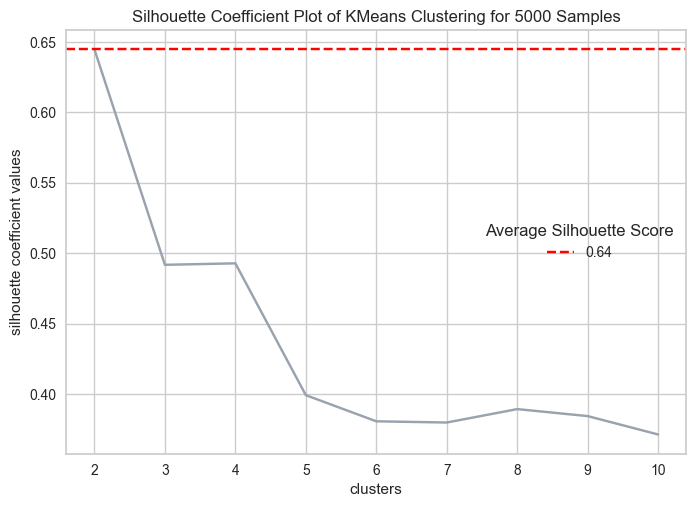

In [25]:
plot_silhouette_coefficients(df_sc, 11)

The highest average silhouette score is found in two clusters. In this sense, the cluster structure is not particularly strong, however, it is not weak either. Every other cluster structure descends into unusability due to a sharp decline, with clusters three and four scratching usability. Therefore, given the usable structure, two clusters are appropriate. As for all other clusters greater than two, they are discarded. A closer examination of the structure is necessary since the silhouette coefficient is only an average.

In [26]:
df_KMeans = KMeans_cluster_assignment(df_ana_sub, 2)

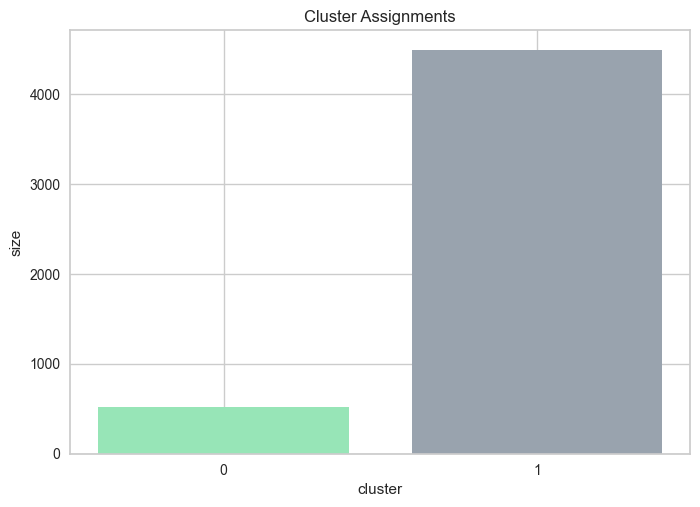

In [27]:
plot_cluster_assignments(df_KMeans)

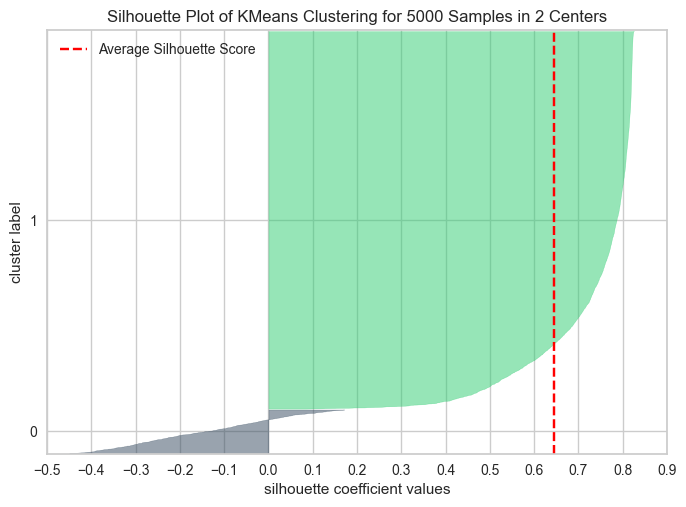

In [28]:
plot_silhouette(df_sc, 2)

The subordinate cluster has relatively few instances, whereas the dominant cluster has relatively many instances. A majority of the instances in the subordinate cluster are in the negative range, with the remainder being positive but still significantly below usability. In terms of structure, it is, therefore, severely lacking. However, none of the instances in the dominant cluster are in the negative range, while many of the instances have high usability, a small portion of which is usable, and a tiny portion of which is unusable. This cluster appears accordingly to have a strong overall structure. Consequently, the subordinate cluster drags down the average silhouette score. The largely negative instances further indicate that the majority of members tend to be closer to the dominant cluster members than to their own.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">3. Hierarchical Clustering</p>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">3.1 Functions</p>

In [29]:
def plot_dendrogram(df_sc, metrics, linkage):
    """Parameter: df_sc = scaled DataFrame
                  metrics = distance measure employed to compute linkage
                  linkage = criterion defining distance between instances of observation
    
       Function: plot dendrogram based on agglomerative hierarchical algorithm
    """
    
    for i in range(0, len(linkage)):
        for j in range(0, len(metrics)):
            agg = cluster.AgglomerativeClustering(metric = metrics[j], 
                                                  compute_full_tree = True,
                                                  linkage = linkage[i],
                                                  compute_distances=True)
            agg.fit_predict(df_sc)

            n_samples = len(agg.labels_)
            counts = np.zeros(agg.children_.shape[0])
            for k, merge in enumerate(agg.children_):
                current_count = 0
                for child_idx in merge:
                    if child_idx < n_samples:
                        current_count += 1
                    else:
                        current_count += counts[child_idx - n_samples]
                counts[k] = current_count
            linkage_matrix = np.column_stack([agg.children_, agg.distances_, counts]).astype(float)

            plt.figure(figsize = (18, 5))
            hierarchy.dendrogram(Z = linkage_matrix,
                       truncate_mode = "lastp",
                       color_threshold = np.inf,
                       orientation = "top",
                       show_leaf_counts = True,
                       leaf_font_size = 15,
                       leaf_rotation = 90,
                       link_color_func = lambda x: "#99a3ae")
            plt.title(label = f"Linkage: {linkage[i].capitalize()}")
            plt.xlabel(xlabel = f"leaves")
            plt.ylabel(ylabel = f"{metrics[j]} distance")
            plt.show()

    return

In [30]:
def HCA_cluster_assignment(df, n_clusters, metric, linkage):
    """Parameter: df = DataFrame
                  n_clusters = number of clusters to form
                  metric = distance measure employed to compute linkage
                  linkage = criterion defining distance between instances of observation

       Function: creates derived variable, concerning clusters        
    """

    agg = cluster.AgglomerativeClustering(n_clusters = n_clusters,
                                          metric = metric, 
                                          linkage = linkage)
    
    labels = agg.fit_predict(df)
    df_HCA = df
    df_HCA["cluster"] = labels

    return df_HCA

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">3.2 Application</p>

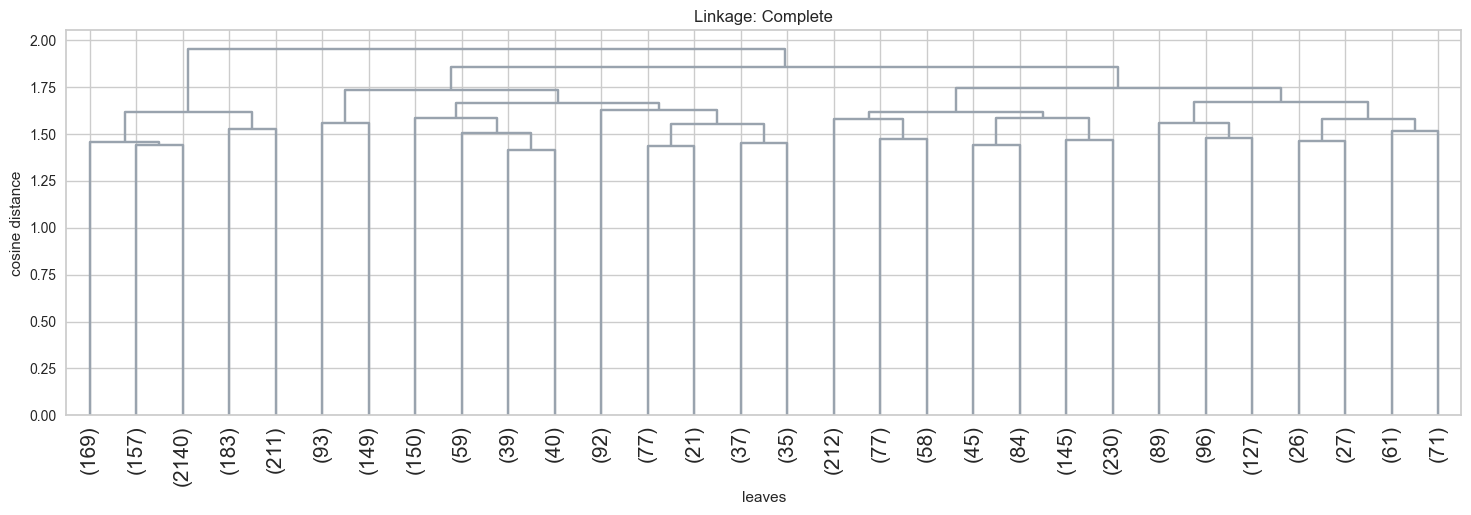

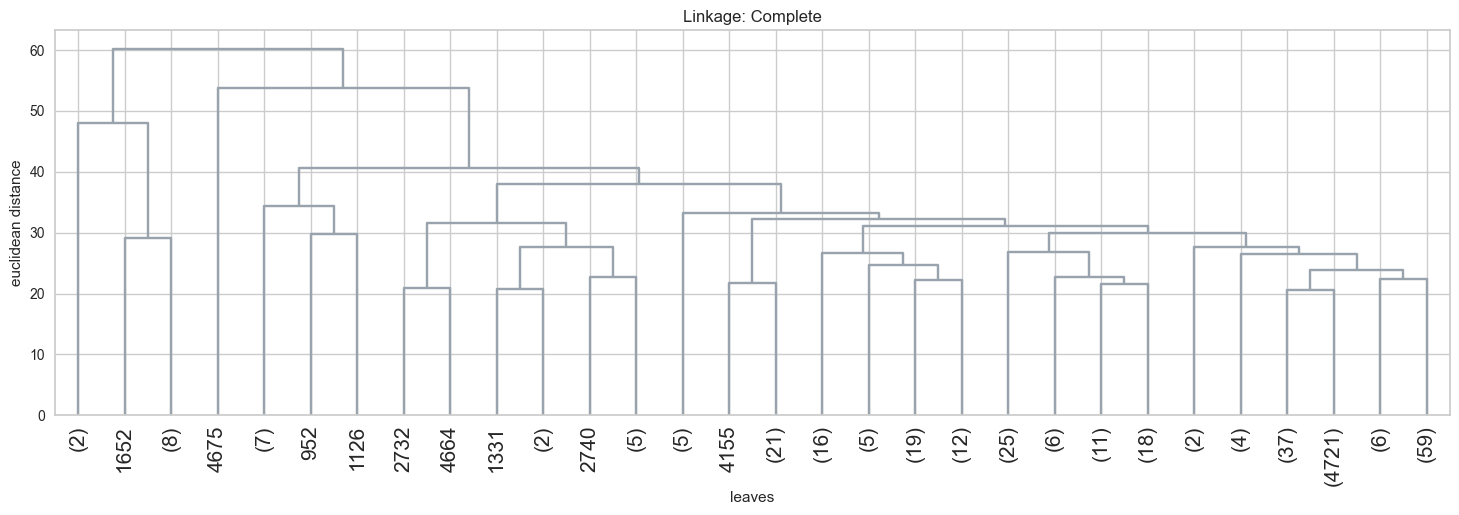

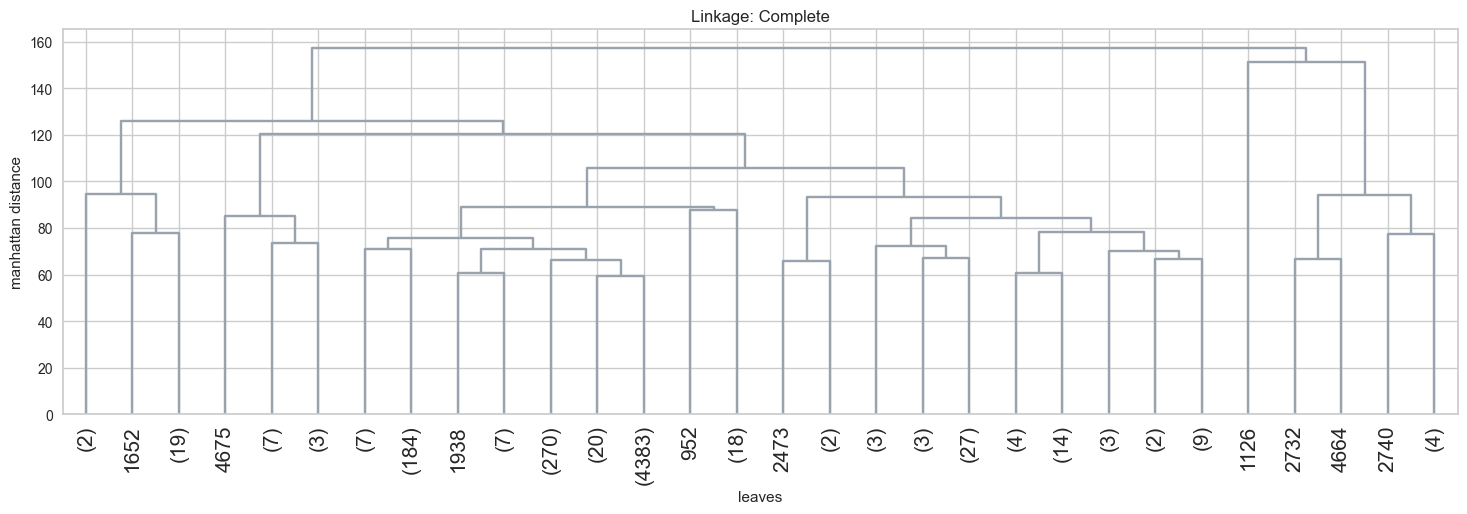

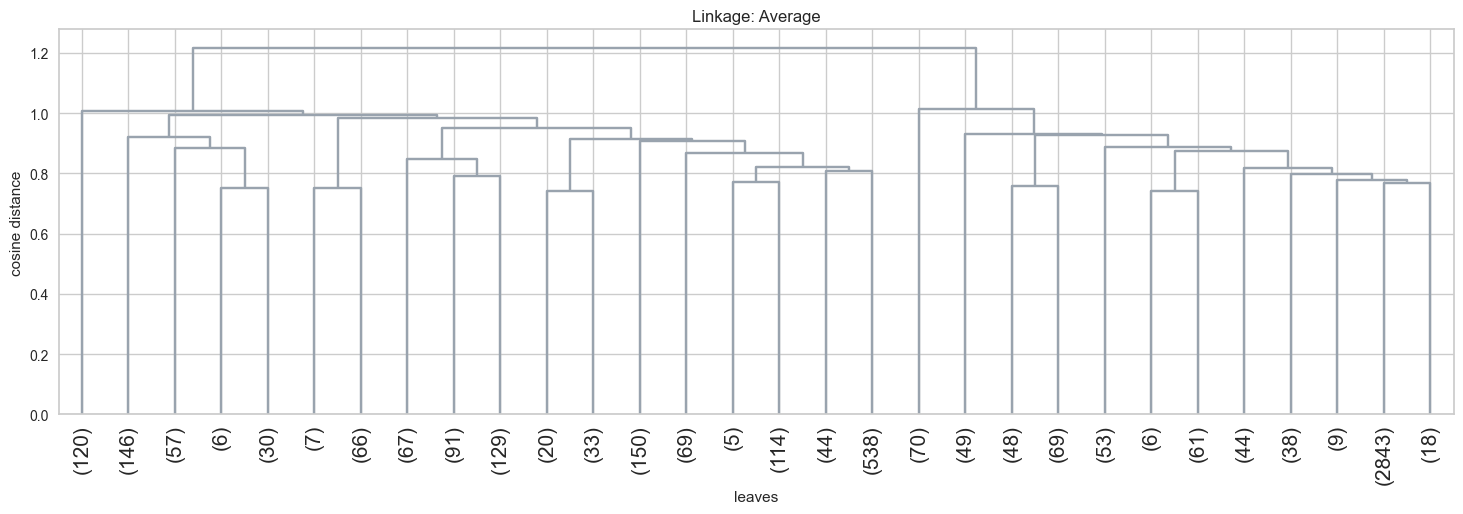

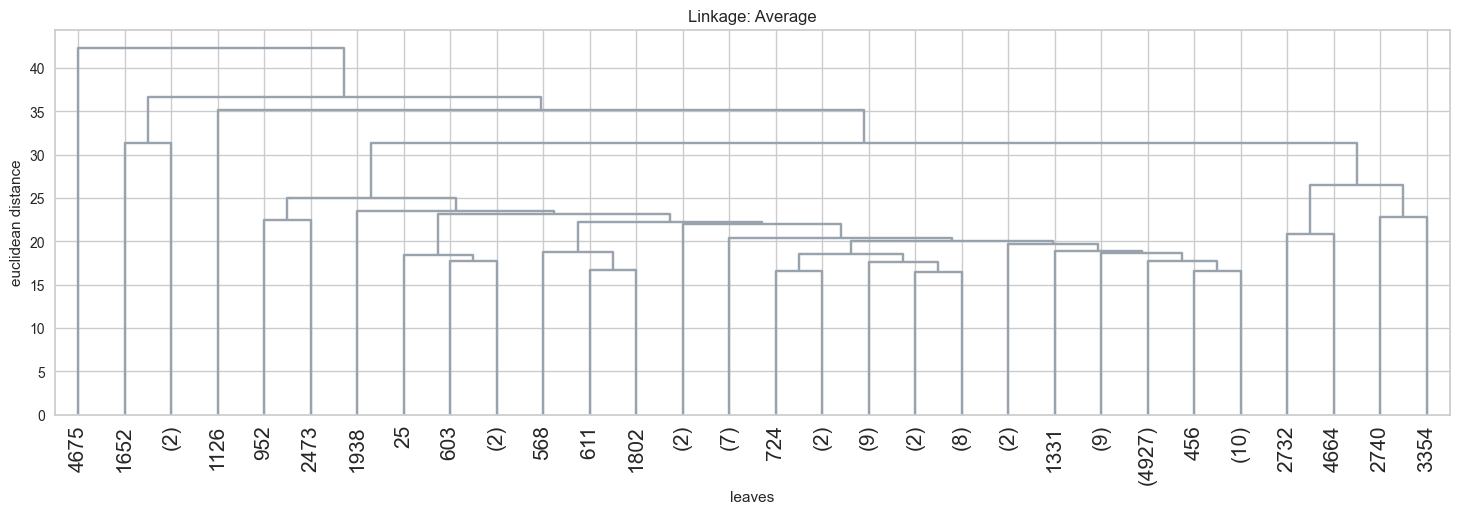

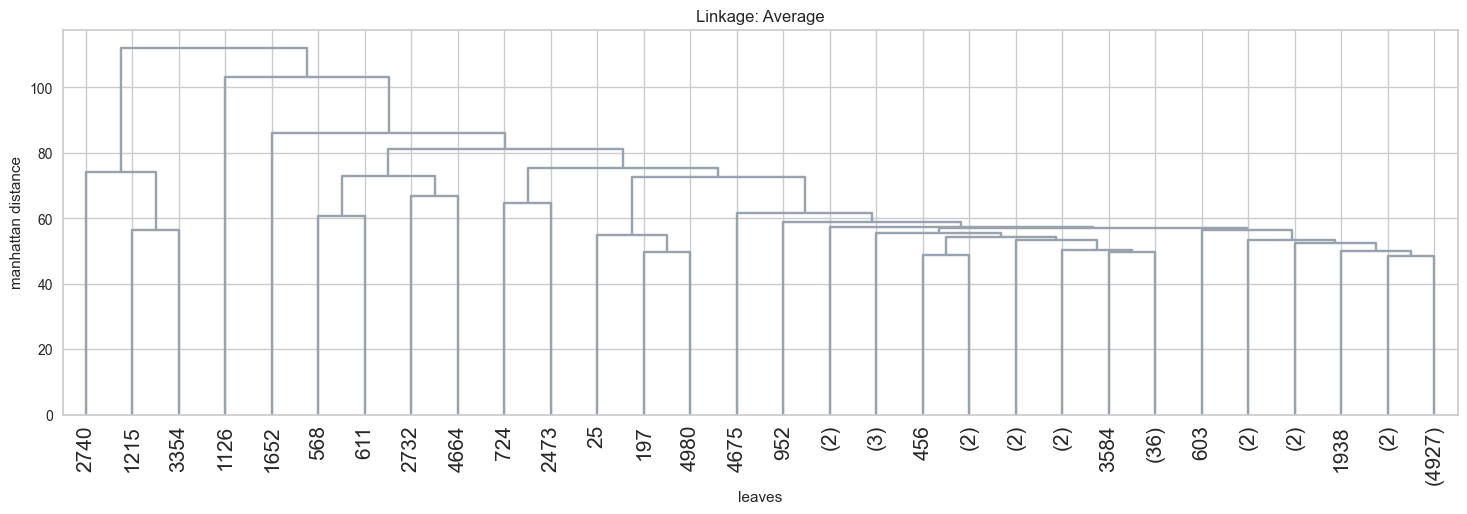

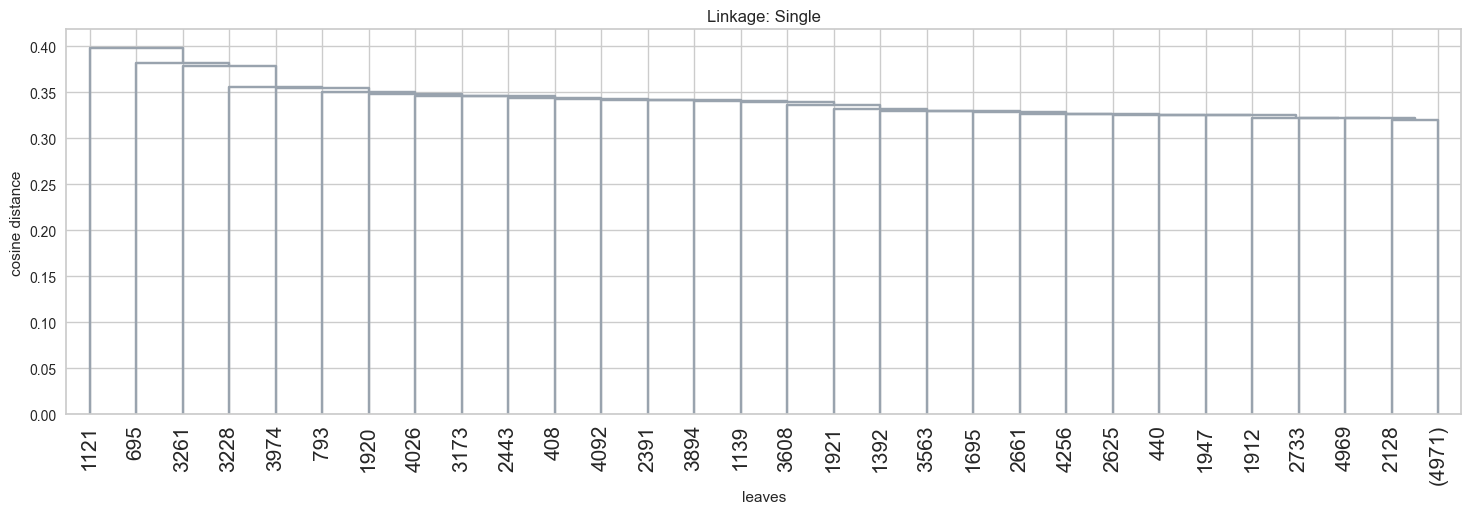

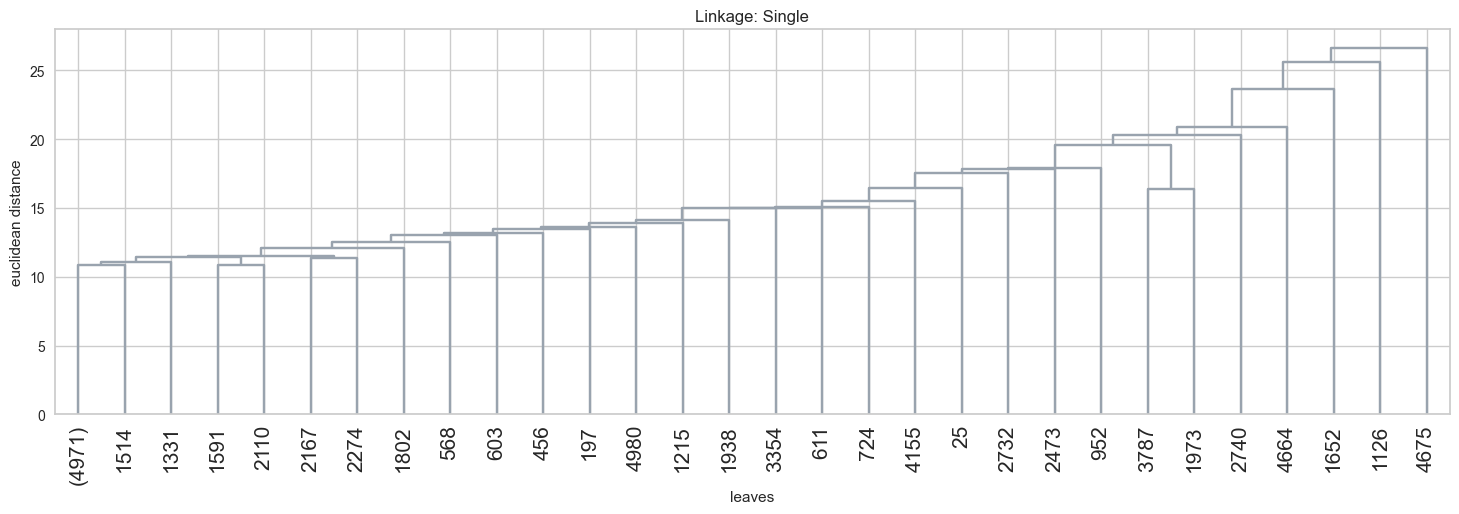

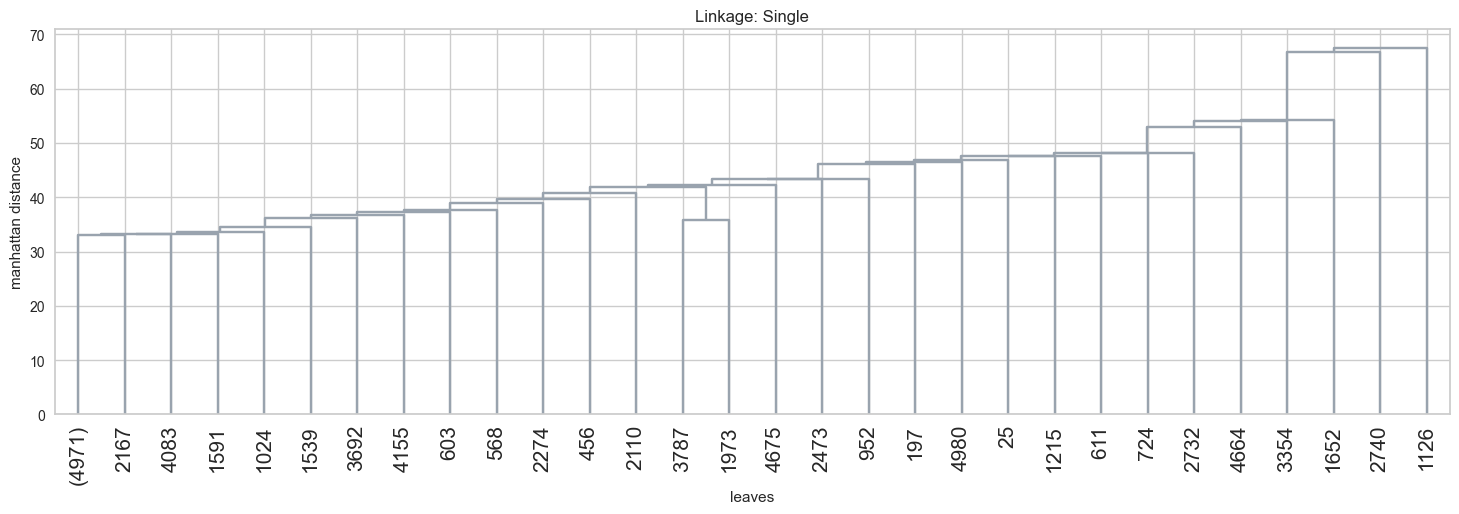

In [31]:
linkage = ["complete", "average", "single"]
metrics = ["cosine", "euclidean", "manhattan"]

plot_dendrogram(df_sc, metrics, linkage)

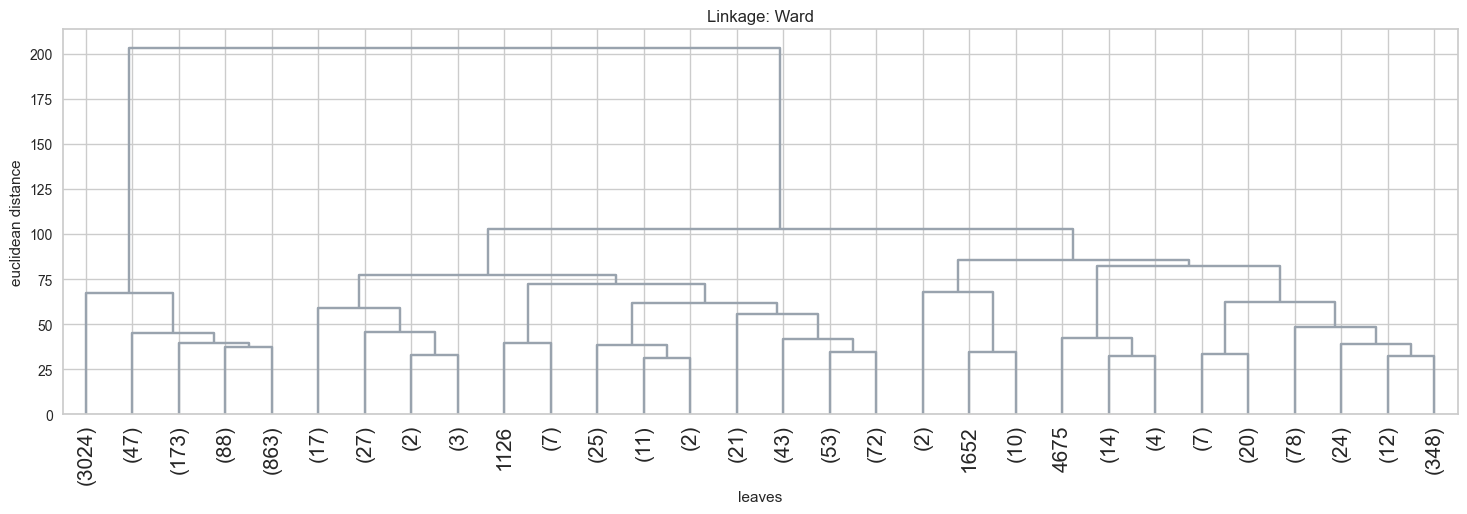

In [32]:
linkage = ["ward"]
metrics = ["euclidean"]

plot_dendrogram(df_sc, metrics, linkage)

Dendrograms in this instance are monochromatic, serving as an indication as to a cutoff point and clustering. Conversely, as no cluster split has been established at this point, color differences are omitted. Considering that the number of available leaves would make a visual inspection infeasible, pruning is performed. The pruned nodes are determined by "lastp", which returns the latest non-singleton nodes and leaf nodes. A default setting of "p" permits the tracing of an existing structure alongside a manageable visual inspection. As it is crucial to avoid overly granular clusters becoming too specific, and thus failing to produce actionable insights, the number of returned nodes is reasonable. Labels of leaf nodes are not enclosed in parentheses, given that the number represents the label of a single leaf. While non-singleton nodes appear with parentheses that indicate the number of leaves contained within the node.

Single linkage dendrograms exhibit an elongated form with a large number of leaf nodes, resembling a long irregular structure, pointing to the chaining effect. Thus, the distances between fused nodes are minimal at all times, preventing separation and identification of a meaningful cutoff point and, therefore, clustering. A cutoff would result in a relatively large cluster and many small clusters with individual instances. In view of the small distances separating the nodes, the cutoff point would be arbitrary, and the resulting clusters would have little practical significance. In a somewhat weaker form, the complete linkage dendrogram based on Euclidean and Manhattan distance also falls victim to the same theme. In contrast, there is no such effect on the complete linkage of the remaining metrics. Despite this, the cosine metric has short branches, resulting in leaves within nodes and nodes themselves looking quite similar, indicating a weak structure among clusters. The compromise between the single and complete linkage, the average linkage, resembles the equivalent in complete with the Manhattan and Euclidean metric, thus exhibiting similar weaknesses. While the cosine metric simply combines both problems. By contrast, the ward linkage with the Euclidean metric, yields two nodes, each with relatively short branch lengths, demonstrating similarity in their leaves. While the nodes themselves have relatively long branches, indicating dissimilarity between them, suggesting a usable overall structure. As a result, the clusters are distinct, neither consisting of a few individual instances. Despite this, it should be noted that one cluster contains significantly more instances than the other. Further, substructures within clusters exhibiting chaining effects are observed. Nevertheless, it has the best structure of any dendrogram, which is why it is selected. Here, the cutoff point represents the trend break in similarities, in which distances are particularly great, leading to two clusters.

In [33]:
df_HCA = HCA_cluster_assignment(df_ana_sub, 2, "euclidean", "ward")

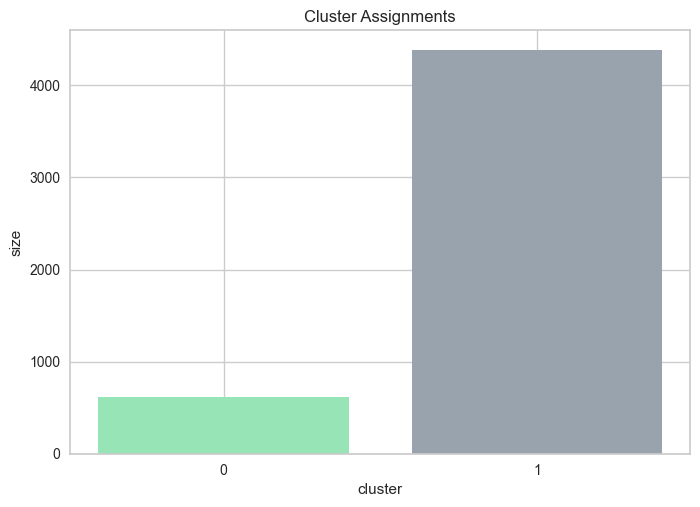

In [34]:
plot_cluster_assignments(df_HCA)

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 6 - Dimensionality Reduction</p>

In an attempt to further improve the structure of clusters, i.e. customer segments, the PCA algorithm is employed to reduce the number of features.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">1. Functions</p>

In [35]:
def variance_per_feature(df_sc):
    """Parameter: df_sc = scaled DataFrame
    
       Function: returns variances per feature
    """
    
    pca = PCA1()
    df_pca = pd.DataFrame(pca.fit_transform(df_sc),
                          index = df_sc.index)
    expl_var = pca.explained_variance_ratio_

    for i in range(0, len(expl_var)):
        print(f"{i + 1:<2}. Principal Component {np.round(a = expl_var[i], decimals = 4)}")

In [36]:
def plot_PCA_explanation(df_sc, n_components):
    """Parameter: df_sc = scaled DataFrame
                  n_components = features to retain
    
       Function: plots scree plot
    """
    
    pca = PCA1()
    df_pca = pd.DataFrame(pca.fit_transform(df_sc),
                          index = df_sc.index)
    expl_var = pca.explained_variance_ratio_
    retain = np.sum(expl_var[:n_components])

    plt.title("Scree Plot");
    plt.xlabel("principal component");
    plt.ylabel("variance");
    plt.axhline(y = retain,
                color = "#fe0101",
                linestyle = "--",
                label = f"{n_components}. Feature with {np.round(a = retain, decimals = 4)}");
    legend_1 = plt.legend(title = "Cutoff Point",
                          loc = "center right")
    plt.gca().add_artist(legend_1);
    explained_variance, = plt.plot(expl_var, 
                       label = "Non Accumulated",
                       color = "#99a3ae")
    explained_accumulated_variance, = plt.plot(np.add.accumulate(expl_var), 
                                               label = "Accumulated",
                                               color = "#97e5b7")
    legend_2 = plt.legend(title = "Explained Variance",
                          handles = [explained_variance, 
                                     explained_accumulated_variance], 
                          loc = "upper left");
    plt.gca().add_artist(legend_2);

    return

In [37]:
def PCA_dataframe(df_sc, n_components):
    """Parameter: df_sc = scaled DataFrame
                  n_components = features to retain"""
    model = PCA2(n_components = n_components)
    results = model.fit_transform(df_sc)
    df_pca = model.results["PC"]

    return df_pca

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2. Application</p>

In [38]:
variance_per_feature(df_sc)

1 . Principal Component 0.3517
2 . Principal Component 0.0706
3 . Principal Component 0.0578
4 . Principal Component 0.0552
5 . Principal Component 0.0464
6 . Principal Component 0.0452
7 . Principal Component 0.0423
8 . Principal Component 0.0404
9 . Principal Component 0.0386
10. Principal Component 0.0316
11. Principal Component 0.0298
12. Principal Component 0.0284
13. Principal Component 0.0256
14. Principal Component 0.0215
15. Principal Component 0.021
16. Principal Component 0.0204
17. Principal Component 0.0181
18. Principal Component 0.0162
19. Principal Component 0.0156
20. Principal Component 0.013
21. Principal Component 0.0107


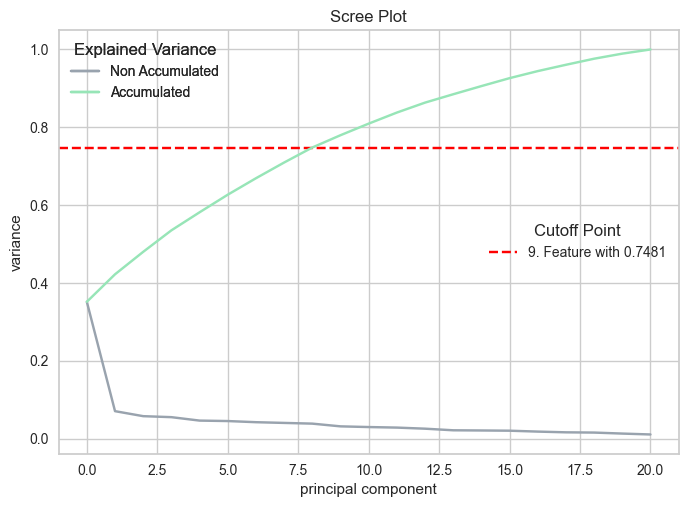

In [39]:
plot_PCA_explanation(df_sc, 9)

In [40]:
df_pca = PCA_dataframe(df_sc, 9)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [21] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


Over 80% of the variance is accounted for by the first ten principal components. A large share (35.17%) is held by the variance of the first principal component. Among the subsequent principal components, from two to ten, variances range between 7.06% and 3.16% percent. Each component that is yet to be mentioned varies between 2.98% and 1.07%. As such, there is a sharp drop in variance after the first principal component. Three small yet relatively sharp declines are observed between 7.06% and 5.78%, between 5.52% and 4.64%, and between 3.86% and 3.16%. Only 42.23% or 53.53% of the overall variance would be reflected in a cutoff in the first or second drop. By the third drop, however, the variance has already reached 74.81%, at which point all other principal components differ only marginally and make relatively little contribution to the overall variance. The point in question represents an optimal compromise between retaining the variance and reducing the features by more than half. In light of this, nine principal components should be retained.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 7 - Clustering II</p>

Here, clustering algorithms are applied again to extract individual segments of users, based on the PCA-reduced DataFrame. As such, this is being done in the expectation that the user segment structure will be improved.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">1. K-Means</p>

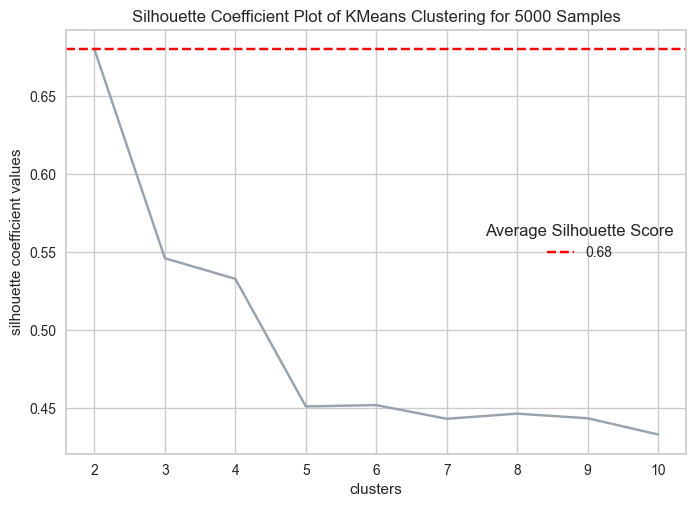

In [41]:
plot_silhouette_coefficients(df_pca, 11)

The average silhouette score in two clusters is 0.68, an increase of 0.04 over the pre-PCA score, maintaining its peak position. Thus, the cluster structure is not incredibly strong, but not unusable either. It is, however, very close to having a strong structure. Among all other clusterings (three to ten), silhouette scores increased by 0.05 on average. Despite all these factors, a sharp drop from two clusters to three is still evident. Even so, three clusters and four clusters can be considered usable, whereas the remainder remains unusable. In view of the relatively large difference between the three clusters and two clusters, two clusters are still recommended, due to their close proximity to a strong structure.

In [42]:
df_pca_KMeans = KMeans_cluster_assignment(df_pca, 2)

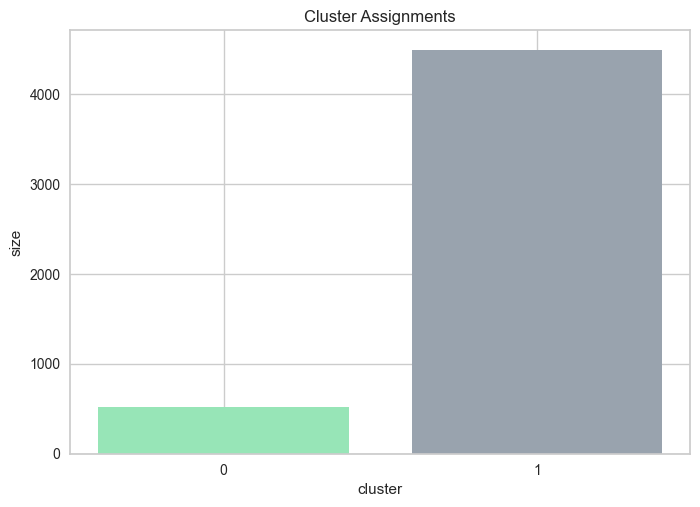

In [43]:
plot_cluster_assignments(df_pca_KMeans)

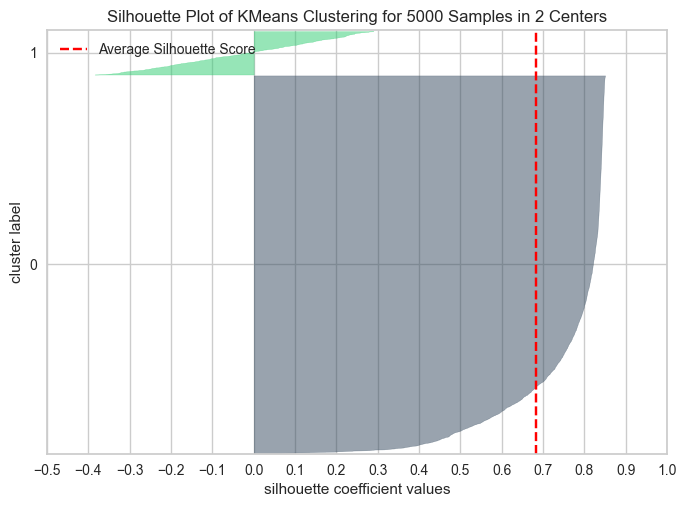

In [44]:
plot_silhouette(df_pca, 2)

The distribution of cluster members appears slightly more skewed towards the dominant cluster as compared to that of prior PCA. In this regard, a dominant cluster is found significantly larger in terms of assigned members, as opposed to the subordinate cluster. It is also worth noting that approximatly half of the subordinate cluster is in positive territory as compared to about a fifth previously. Among such members, those with positive silhouette scores increased by 0.1, yet are still well below usable levels. Its remaining members exhibited similar negativity magnitudes. In this respect, cluster one has a better overall structure, but remains unusable. While the posture of the dominant cluster has been minimally strengthened in all areas compared to its previous state. A strong structure is therefore maintained somewhat similar to the prior state. Although the subordinate cluster has demonstrated relatively positive growth, it continues to drag down the average silhouette score that the dominant cluster is carrying. It is noteworthy, however, that close to half of the members of the subordinate cluster reside at a greater distance from members of the dominant cluster than they do from members of their own kind.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2. Hierarchical Clustering</p>

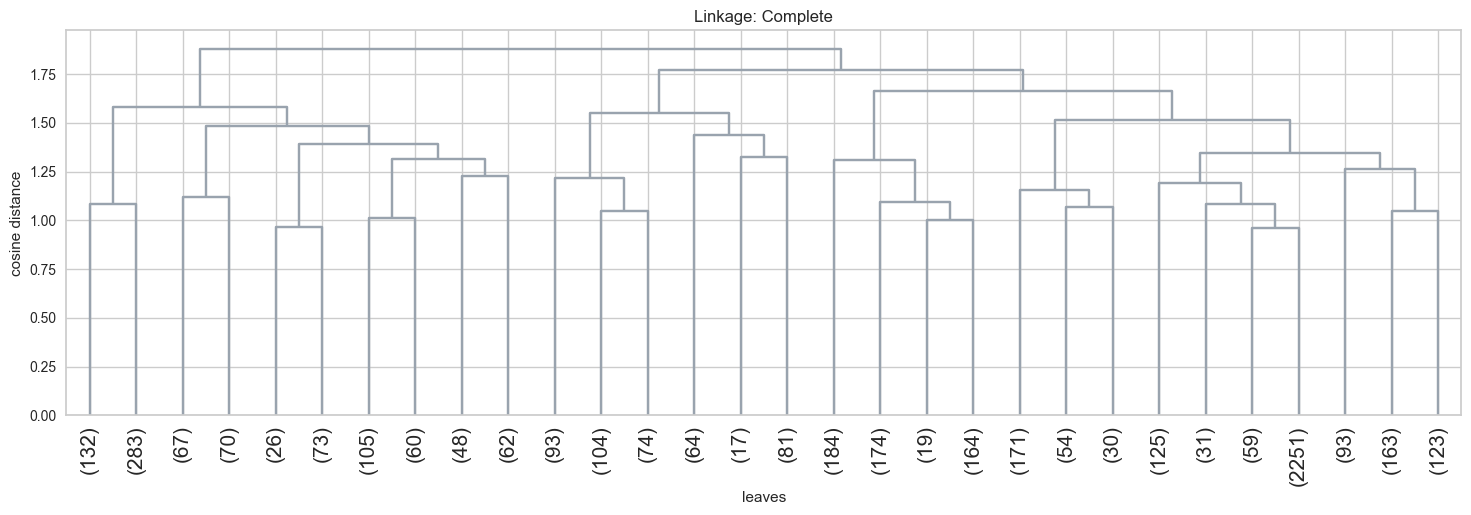

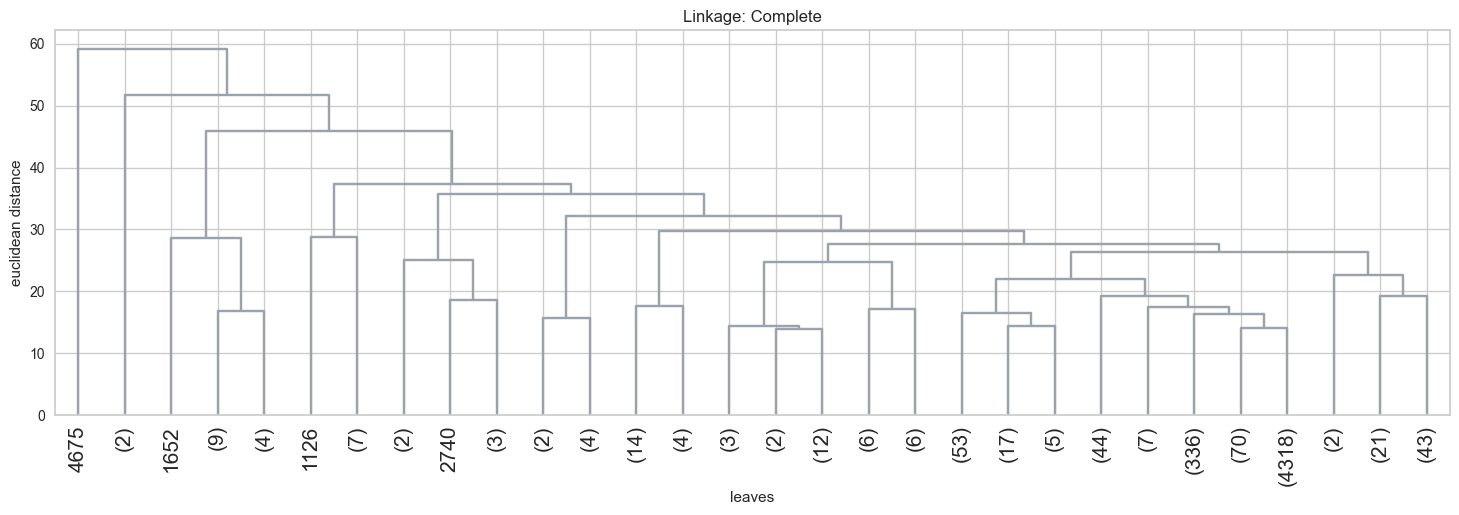

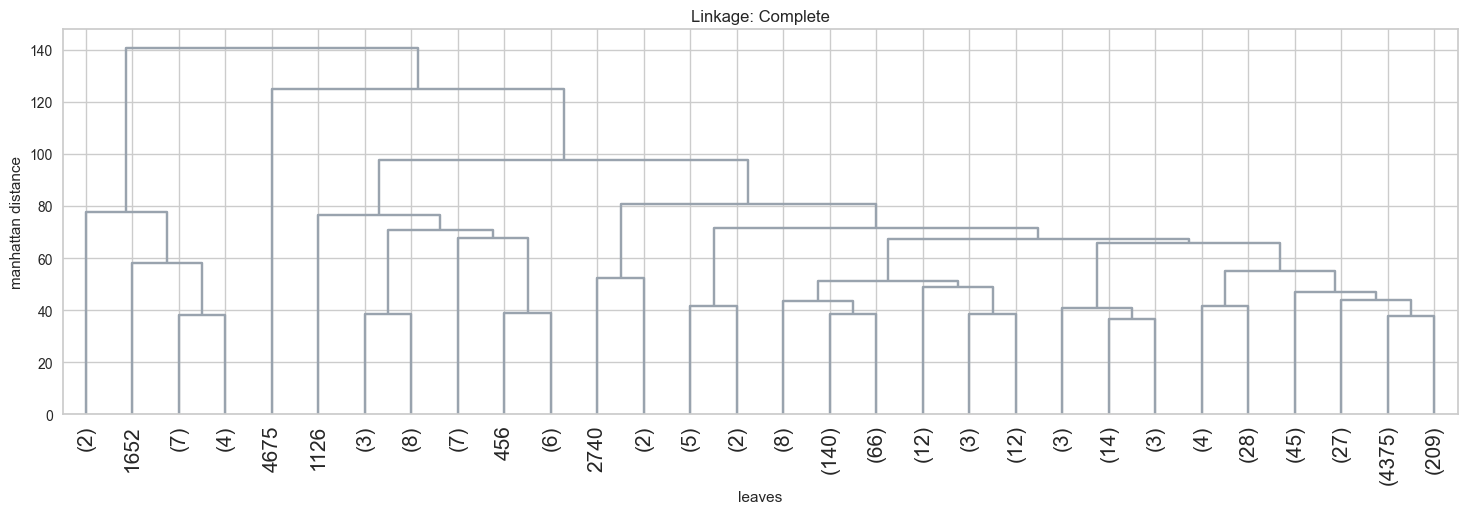

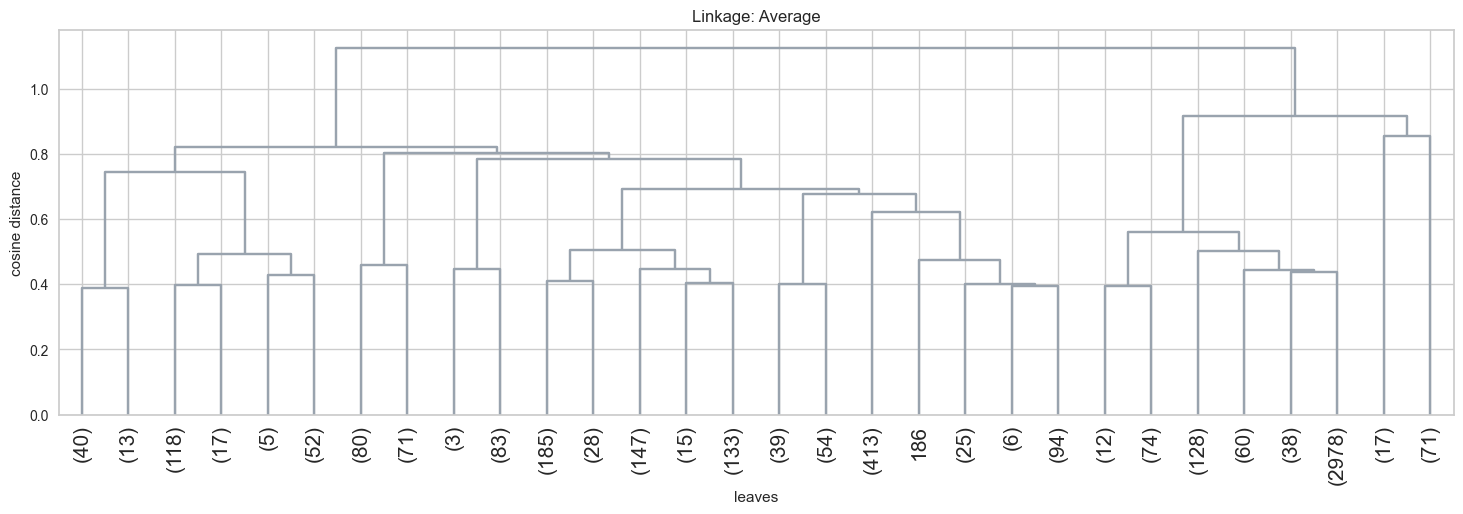

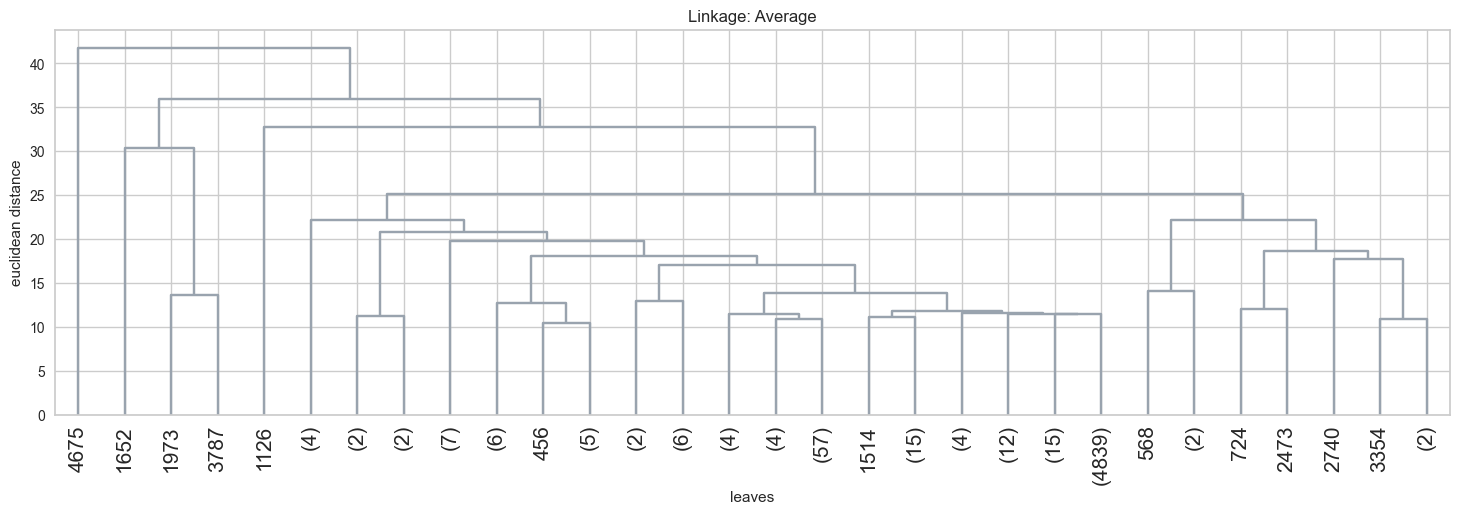

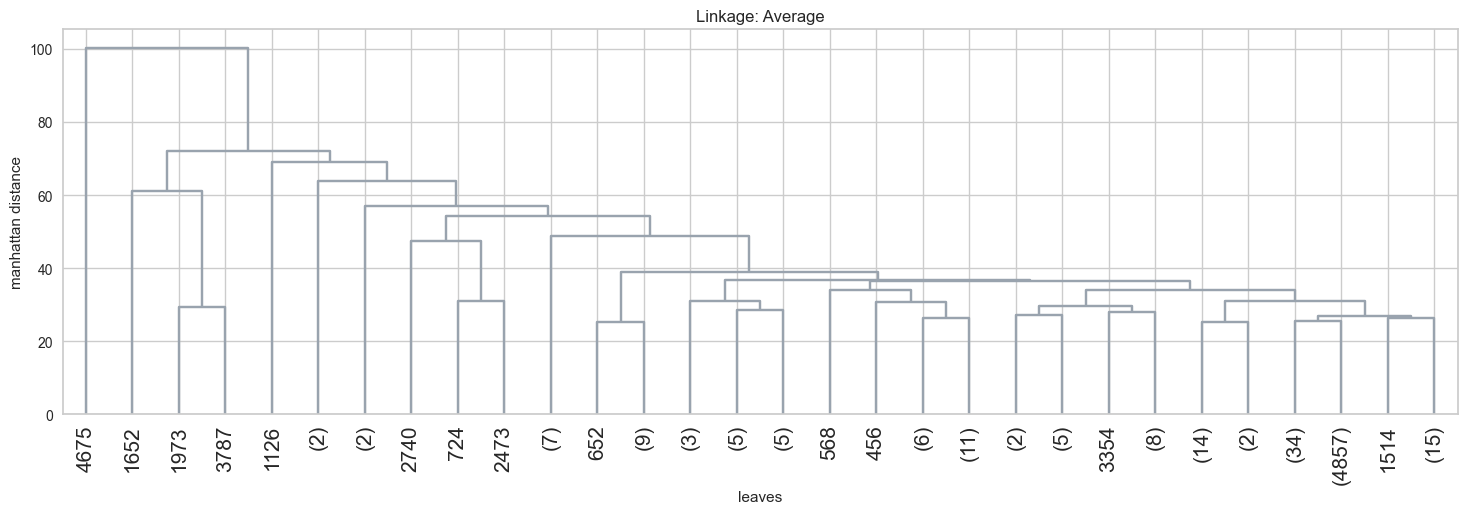

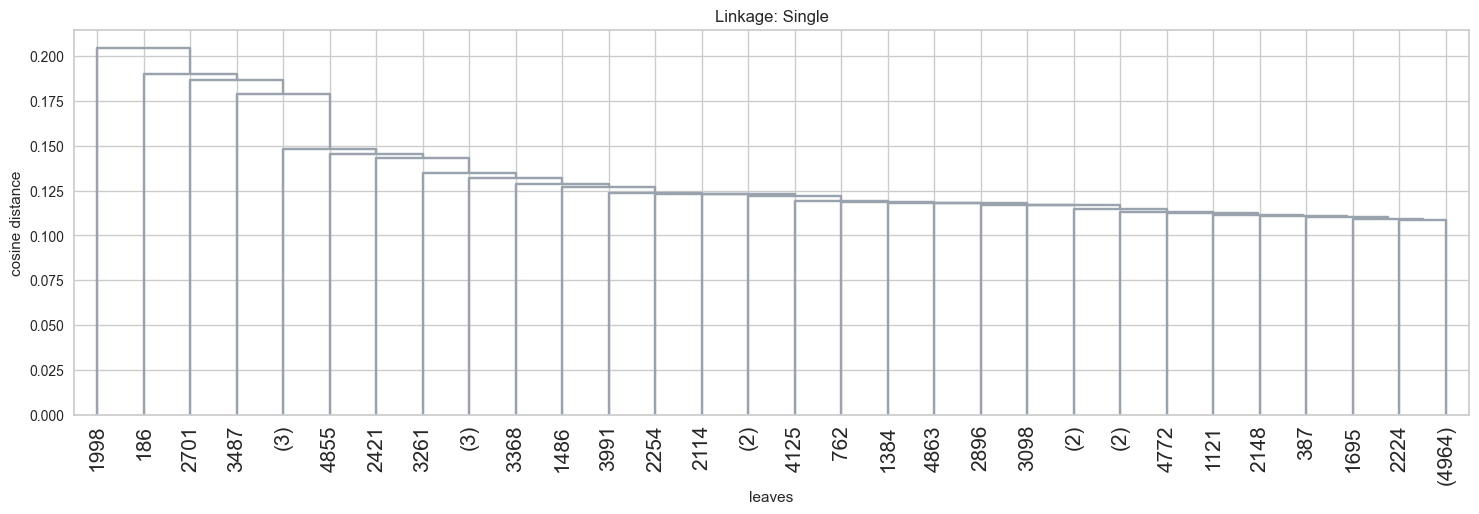

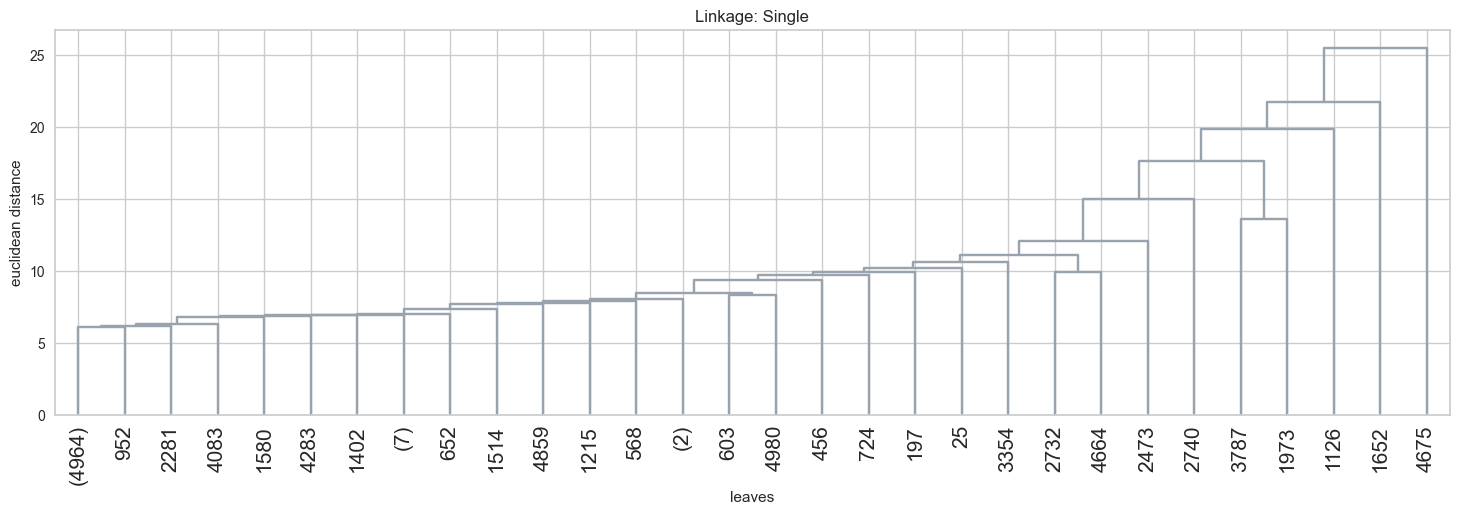

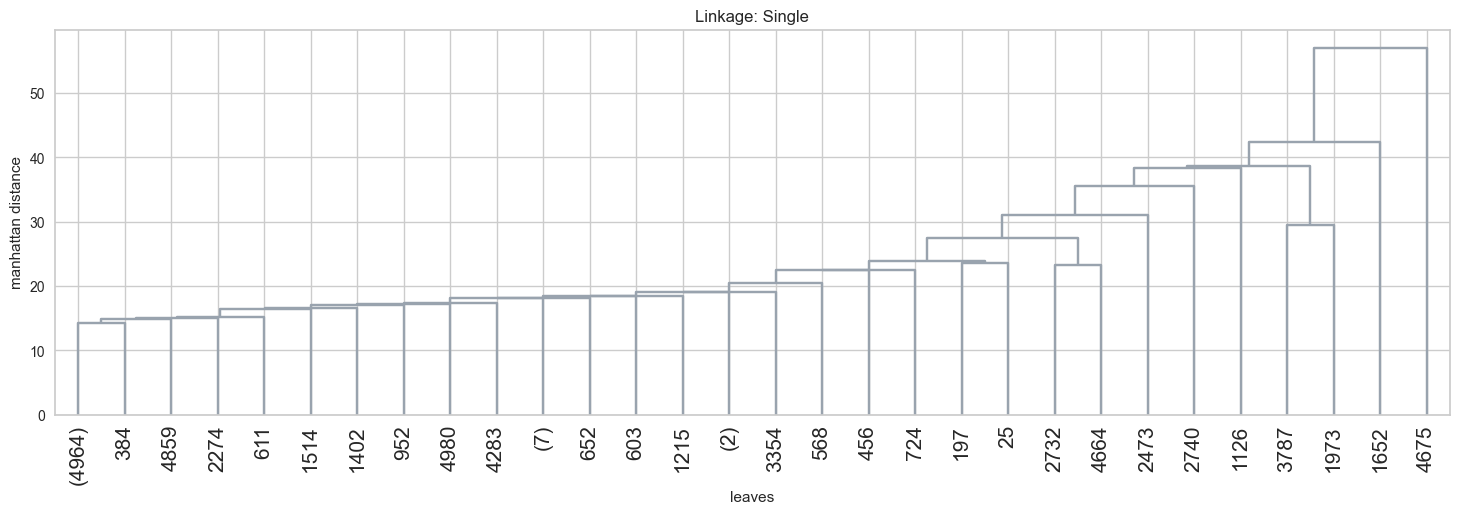

In [45]:
linkage = ["complete", "average", "single"]
metrics = ["cosine", "euclidean", "manhattan"]

plot_dendrogram(df_pca, metrics, linkage)

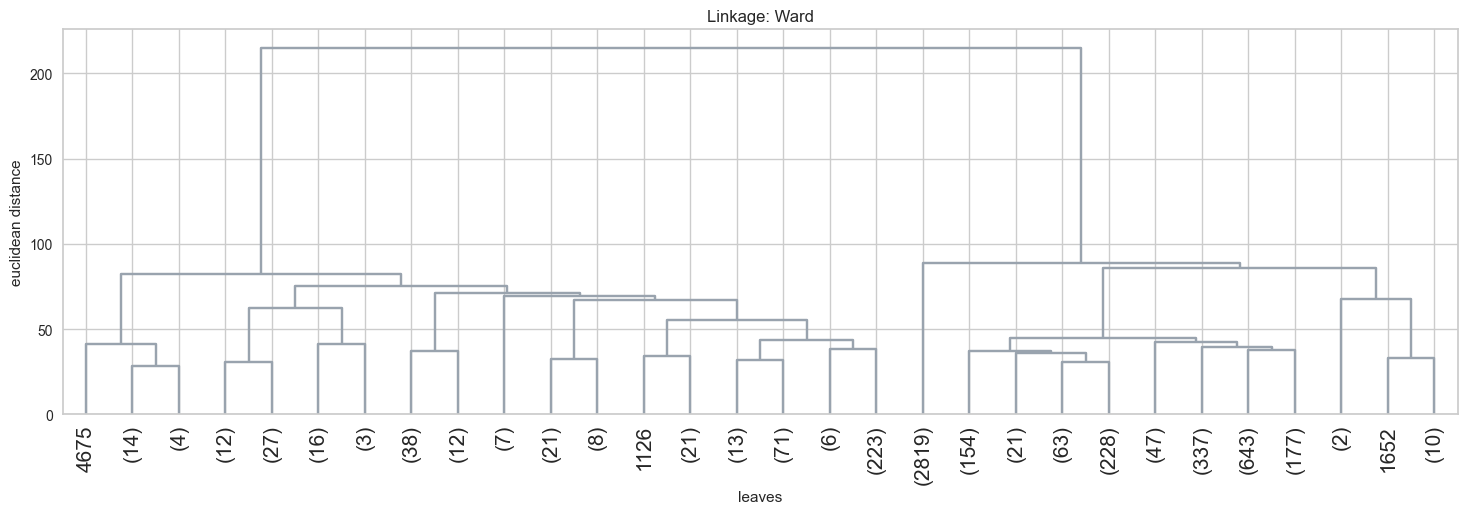

In [46]:
linkage = ["ward"]
metrics = ["euclidean"]

plot_dendrogram(df_pca, metrics, linkage)

PCA reveals three main observations. Observation one is that chaining effects slightly worsened when present. Second, if such effects were absent, the structure slightly improved. As can be seen in observation three, however, if there was a mixture, the structure changed such that the chaining effect became dominant. The consequences of this were as follows.

<center>

<b>Observation 1</b>

<em>all single linkages and Euclidean as well as Manhattan complete and average linkages deteriorated slightly in terms of chaining effects</em>

<b>Observation 2</b>

<em>cosine complete linkage slightly improved its structure</em>

<b>Observation 3</b>

<em>cosine average linkage deteriorated into chaining effects</em>

</center>

Considering that the Euclidean ward linkage used prior to PCA is a special case, it is noted separately. The leaves of the selected nodes showed a mixed form, so that the structure deteriorated into chaining effects, producing even more similar leaves. However, there was no chaining effect on the two nodes themselves, which implies that those moved in similarity slightly apart according to observation two. The overall structure improved, which is why the same linkage is selected again, retaining the same number of clusters. As compared to prior PCA, the distribution of cluster members appears to be slightly more skewed towards the dominant cluster.

In [47]:
df_pca_HCA = HCA_cluster_assignment(df_pca, 2, "euclidean", "ward")

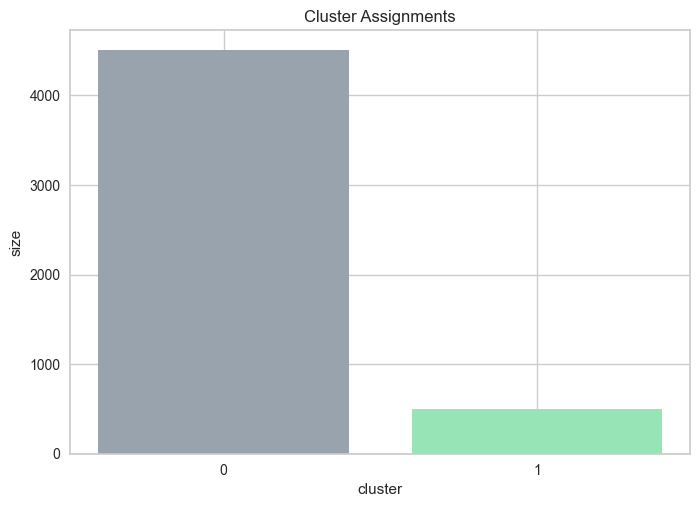

In [48]:
plot_cluster_assignments(df_pca_HCA)

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 8 - Cluster Interpretation</p>

In the course of this section, a clustering, i.e. a certain arrangement of segments of users, is selected, visualized, and its attributes are extracted. As a result, the goal set at the beginning should be achieved.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">1. Cluster Selection</p>

Statistics suggest the existence of a cluster with a particularly strong structure, in K-Means. As opposed to hierarchical clustering, which is not indulging in statistical means, for structure evaluation. Such evaluation relies on eyeballing, subject to human error. Eyeballing is affected by variables such as dendrogram reading and domain knowledge. Due to the absence of a domain expert within this experiment, the eyeballing conducted, and thus the clustering may be flawed. As such, K-Means will be used for now until domain experts are consulted.

Moreover, the PCA-reduced DataFrame is considered, in light of the project's requirement for visualization. Reduced principal components represent the initial features in their variance. As such, it is to be ensured to the greatest degree possible, that the DataFrame, is meaningfully visualized within a two-dimensional plot. While the selection of features within a non-PCA reduced DataFrame to be visualized would be arbitrary, wherefore its meaningfulness is questionable. However, 25.19% of the variance was lost at the expense of the unusable cluster. The cluster whose structure was already strong only showed minimal improvement. This resulted in a loss of variance for little benefit. Even so, as 74.81% is still a significant amount, the upside far outweighs the downside.

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">2. Cluster Visualization</p>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">2.1 Function</p>

In [49]:
def plot_clusters_with_centers(df_sc):
    """Parameter: df_sc = scaled DataFrame
    
       Function: scatter plots the first two features within DataFrame
    """

    colors = ["#99a3ae", "#97e5b7"]
    cols = df_sc.columns

    kmeans = KMeans(n_clusters = 2,
                    init = "k-means++",
                    n_init = 10,
                    random_state = random_state)
    cluster_assignments = kmeans.fit_predict(df_sc)
    cluster_centers = kmeans.cluster_centers_

    plt.figure(figsize = (8, 8))
    for i in range(0, len(np.unique(cluster_assignments))):
        plt.scatter(df_sc[cluster_assignments == i][[cols[0]]], 
                    df_sc[cluster_assignments == i][[cols[1]]], 
                    c = colors[i], 
                    label = i)
    plt.scatter(
        cluster_centers[:, 0],
        cluster_centers[:, 1],
        s = 350, 
        marker = "*", 
        c = "#fe0101", 
        edgecolor = "#fe0101")
    plt.title("K-Means Clustering")
    plt.xlabel("principal component one")
    plt.ylabel("principal component two")
    plt.legend(title = "Cluster",
               loc = "upper left")
    
    return

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">2.2 Application</p>

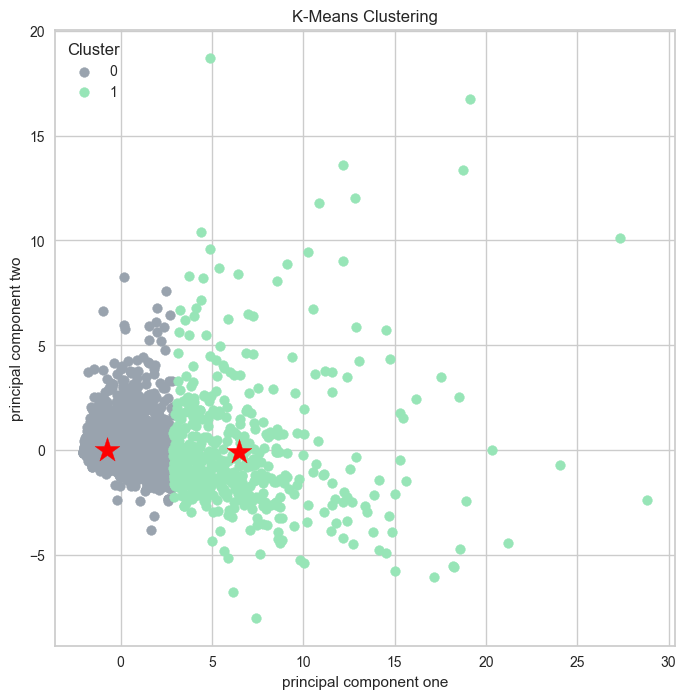

In [50]:
plot_clusters_with_centers(df_pca)

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 150%; text-align: center; border-radius: 10px 10px;">3. Analysis</p>

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">3.1 Function</p>

In [51]:
def PCA_loadings(df_sc, n_components):
    """Parameter: df_sc = scaled DataFrame
                  n_components = features to retain
    
       Function: returns loadings of principal components
    """
    model = PCA2(n_components = n_components)
    results = model.fit_transform(df_sc)
    df_pca = model.results["loadings"]

    return df_pca

In [52]:
def plot_loading(df, row):
    """Parameter: df = DataFrame
                  row = row to be plotted
                  
       Function: bar plots single loading instance distrubition of PCA"""

    row = df.iloc[[row]]

    row = pd.melt(row, 
                  var_name = "department", 
                  value_name = "correlation")
    sns.barplot(data = row, 
                x = "correlation", 
                y = "department");
    plt.title("Loadings");

    return

In [53]:
def plot_rows_as_bar(mPCS):
    """Parameter: mPCS = mean of principal component score
    
       Function: bar plots absolute mean of principal component score per cluster
    """

    row_number = mPCS.shape[0]
    fig, ax = plt.subplots(nrows = row_number,
                           ncols = 1);
    fig.suptitle("Analysis");
    plt.subplots_adjust(hspace = 0.5);
    
    for i in range(0, row_number):
        row = mPCS.iloc[[i]]
        row = pd.melt(row, 
                      var_name = "y", 
                      value_name = "x")
        row["x"] = abs(row["x"])
        sns.barplot(data = row, 
                    x = "x", 
                    y = "y",
                    ax = ax[i]);
        ax[i].yaxis.set_label_text("");
        ax[i].set_title(f"Cluster {i}");
        ax[i].set_xlabel("principal component score (absolute mean)");
        if i != row_number:
            ax[0].xaxis.set_label_text("");

    return

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 100%; text-align: center; border-radius: 10px 10px;">3.2 Application</p>

In [54]:
pd.set_option("display.max_columns", 21)

In [55]:
loadings = PCA_loadings(df_sc, 9)

loadings

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [21] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[9]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,frozen,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
PC1,0.016823,0.127897,0.273901,0.229011,0.226949,0.075602,0.270318,0.311540,0.228585,0.281520,0.272534,0.170225,0.218204,0.238812,0.099213,0.073342,0.305584,0.180904,0.047273,0.282104,0.256894
PC2,0.254991,-0.140725,-0.068949,0.173000,0.046598,-0.221694,-0.067500,-0.106700,-0.131032,-0.074587,-0.018868,0.537175,-0.048945,-0.158860,-0.015905,0.223682,0.006740,0.473347,0.379732,-0.232638,0.035335
PC3,0.003828,0.054161,0.071737,0.385413,0.345079,0.223443,-0.297609,0.124067,0.098234,-0.224283,-0.108182,-0.060968,-0.322829,-0.301779,0.273069,0.092002,-0.137605,-0.053909,-0.214141,-0.054394,0.382155
PC4,0.659616,-0.073927,0.043469,-0.044425,-0.082671,-0.023820,0.002928,-0.016921,0.107839,-0.002918,-0.053604,-0.141440,0.030982,0.107740,-0.042188,0.615040,0.050179,-0.168952,-0.279883,0.053830,-0.091912
PC5,0.031526,-0.567928,-0.105788,0.029478,-0.183858,0.590738,0.099422,-0.058800,0.027657,-0.097875,-0.076634,-0.046035,0.119504,0.032506,0.349096,0.002748,0.094314,-0.030250,0.301662,0.108101,-0.015522
PC6,-0.114477,-0.153064,-0.090081,0.010889,-0.101179,-0.583491,0.047472,-0.016783,0.011598,-0.023078,0.074417,-0.065001,0.097677,0.018623,0.742435,0.019602,0.049867,-0.024145,-0.163292,-0.005772,-0.017899
PC7,0.102045,0.658841,-0.156474,-0.171492,-0.184601,0.359648,0.002133,-0.028658,-0.226178,0.061993,-0.051529,0.110605,-0.013875,-0.006812,0.409831,0.067746,-0.050929,0.246265,-0.048985,0.073002,-0.154028
PC8,0.154563,0.307158,0.004266,-0.012843,0.013275,-0.161381,-0.007366,0.047372,0.134735,-0.050244,0.076881,-0.336463,-0.028182,-0.052279,0.093099,0.076310,-0.104875,-0.308723,0.757154,-0.000934,0.125132
PC9,-0.639005,0.022355,-0.083156,-0.070044,-0.106212,0.027394,-0.007825,-0.030689,0.217182,-0.020247,0.017019,-0.045384,-0.090289,-0.057093,-0.093193,0.684235,-0.003291,0.124571,0.062865,0.075617,-0.054007


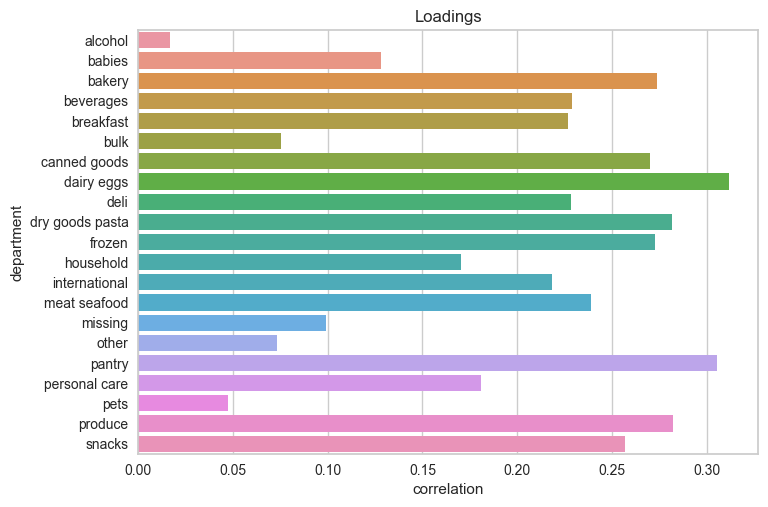

In [56]:
plot_loading(loadings, 0)

In [57]:
means = df_pca_KMeans.groupby('cluster').mean()

means

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
cluster,,,,,,,,,
0,-0.707935,0.002363,0.002237,0.024695,-0.014074,-0.002839,-0.016152,-0.017309,-0.005309
1,6.399842,-0.021358,-0.020225,-0.223251,0.127232,0.025664,0.146013,0.156480,0.047996


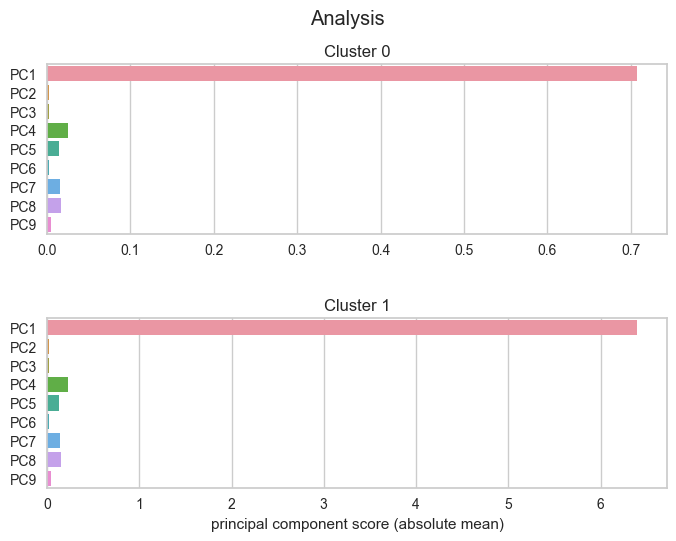

In [58]:
plot_rows_as_bar(means)

Principal component means based on standard scalers, with clusters generated by the K-Means algorithm, grouped by cluster, are shown. Standard scaling causes the means to be centered around zero. A positive value suggests above average, a negative value below average, and zero average. In the context of the experiments, above average indicates an above average number of orders for products from a respective department as represented by the principal component, and vice versa. Those features may be present in varying degrees within the principal components depending upon loading. High loadings are strongly correlated with high principal component scores. Accordingly, if the mean of a cluster's principal component score is negative, there is a tendency for fewer orders to be placed in departments with positive high loadings as opposed to departments with negative high loadings.

A pattern of opposite principal component scores can be observed between clusters. Therefore, clusters exhibit opposing patterns of order behavior. In this regard, users of the dominant cluster should receive different recommendations than those of the subordinate cluster. Further, the absolute principal component scores within a cluster follow a similar order from a quantitative perspective regardless of the cluster. Moreover, the size-wise subordinate cluster tends to be closer to zero by a multiple of absolute standard deviations. The dominant cluster is also more likely to be above average than the subordinate cluster. 

For both clusters, principal component one is by far the most significant. It is noteworthy that the dominant cluster is above average and the subordinate cluster is below average. It is evident that principal component one is strongly correlated with the departments of bakery, canned goods, dairy and eggs, dry goods and pasta, frozen, pantry, produce as well as snacks. Within principal component one, however, there are no noteworthy negative loadings. As to the initial explanatory data analysis, it appears that the high principal component mean scores are driven by dairy and eggs, frozen, pantry, produce as well as snacks. The dominant cluster seems prone to order more from those departments. As opposed to the subordinate cluster, which seems more averse to such orders. 

<p style="background-color:#080808; font-family: newtimeroman; color: #FFF9ED; font-size: 200%; text-align: center; border-radius: 10px 10px;">Task 9 - Conclusion and Future Work</p>

With regard to cluster interpretation, K-Means was applied to a DataFrame based on a standard scaler and PCA. Accordingly, the average per cluster revealed to what extent each cluster's ordering behavior was in line with the average. Relevant attribute observations are those above or below the average. Both clusters' attributes were dominated by the principal component one. Thus, tendencies were derived whose interpretation is relative. Accordingly, an interpretation of such a relativity would call for additional means of expressing the effect size, for validation. Further, the size-wise dominant cluster exhibited far larger absolute standard deviations from the mean. It may be due to the quality of the structures, as half of the subordinate cluster members are located closer to the dominant cluster members, thus pulling the cut to the center. The weak structure also calls into question to what extent hypotheses would be reliable for that cluster. The formulation of such hypotheses suffered, as a consequence of PCA's lack of interpretability. As a general rule, tendencies in the case of above average or aversions in the case of below average respond more strongly to high loadings of a feature within a principal component. Effect sizes within such principal components for positions below and above average would define the magnitude of response. A hypothesis could, however, be developed as follows.

<center>

<b>Hypothesis</b>

<em>The dominant customer segment seems more prone to orders from the departments of dairy and eggs, frozen, pantry, produce, as well as snacks, whereas the subordinate segment exhibits the opposite tendencies.</em>

</center>

These experiments were designed to extract user segments and differences in their attributes. By clustering, customer segments have been created. It is noteworthy, however, that there is a dominant cluster and a subordinate cluster. The segments are therefore questionable since most customers belong to the dominant cluster. In the case of the subordinate cluster, hypotheses may be derived for a particular group of users. However, their implications may not be that practical due to the weak cluster structure. What remains is a single customer segment, wherefore overall segmentation by K-Means was not very effective. Based on those segments, attribute tendencies were derived, requiring further validation by effect sizes. Therefore, concrete attributes were not specified, but guidelines were given as to what they might be. This case provides value by indicating, given those tendencies, which products by department might be promotable as well as recommendable to a broad audience and which might not. For this reason, it might be more appropriate to provide recommendations and promotions for departments from the hypothesis to the dominant user segment, whereas this might be counterproductive for the subordinate segment.

Considering the results of these experiments, Instacart is recommended to validate tendencies. Therefore, a method of estimating effect sizes must be applied so as to determine the magnitude of the response associated with high loadings of the features within the principal component. Depending on the result, a low to medium magnitude would invalidate the hypothesis. Validated tendencies can be employed as first suggestions for recommendations and promotions.

Future Work:
- confirmatory analysis / hypothesis testing 
- analysis of hierarchical clustering (following consultation of domain expert regarding cutoff point)
- fine grained approach (considering aisles instead of departments)